# Project 2: Ames Housing Saleprice Prediction

<img src="../assets/graphics/Ames.jpg">

## Executive Summary

In this project, we dived into an exceptionally detailed and robust housing dataset from the city of Ames in Iowa, USA.

After the initial phase of EDA and cleaning, we fitted various models to the housing data to determine features that are most/least influential to housing prices.

After which, our predictions were submitted to [Kaggle](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/submit) to see how our model does against unknown data.

Lastly, the project ends off with findings and recommendations from our models.

Due to the length of the project, I've split it up into two Jupyter notebooks:
1. EDA & Cleaning (current notebook)
2. Predictive Modeling

## Problem Statement

["Location, location, location."](https://www.thebalance.com/what-location-means-in-real-estate-1798766) We've heard this mantra countless times when talking to a real estate agent about the home values. In a nutshell, it means homes can vary widely in value due to their location. However, are there other features and metrics that we can look at to predict home values? Homeowners looking to increase the value of their homes often spend too much on remodelling and don't get the return of investment they're expecting when selling the house.

As such, we want to predict the saleprice for houses in Ames:
- Apart from the location, what features add the most value to the house, and which hurt the value the most?
- As a homeowner, is there anything you can do to your house to increase your sale price?

### Contents:

### Dataset: 

Dataset contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010. Source: Ames, Iowa Assessor’s Office. Full description can be found in the data documentation [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Data Import and Cleaning

Load `train.csv` and `test.csv` files:

In [2]:
train = pd.read_csv('../datasets/train.csv')

test = pd.read_csv('../datasets/test.csv')

## Data Cleaning: Train Dataset

In [3]:
train.shape

(2051, 81)

In [4]:
train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [5]:
test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]

First impressions on columns: The `train` dataset has an additional `SalePrice` column and we'll also have to rename all columns to lower case and snake_case format.

In [6]:
# make columns lower case and snake_case

train.columns = train.columns.str.lower().str.replace(' ', '_')
test.columns = test.columns.str.lower().str.replace(' ', '_')

print(train.columns)
print(test.columns)

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

For organization sake, I will be focusing on the train dataset first. 

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

### Train Dataset: Null Values

Looking at the columns info above, there are null values across 26 different columns. We will have to dig deeper into the null entries before deciding on next steps for cleaning. For clarity sake, I will dividing the null entries into two types: categorical vs numerical.

In [8]:
# identifying categorial columns with null values

# creating df for categorial columns with null values
train_obj_nulls = pd.DataFrame(train.isnull().sum()[train.isnull().sum()>0][train.dtypes == 'object'])

# rename df column 
train_obj_nulls.columns = ['number of null values']

print('There are', len(train_obj_nulls),'categorical columns with null values:')
train_obj_nulls.sort_values(by = 'number of null values', ascending = False)

There are 15 categorical columns with null values:


number of null values
pool_qc                          2042
misc_feature                     1986
alley                            1911
fence                            1651
fireplace_qu                     1000
garage_finish                     114
garage_qual                       114
garage_cond                       114
garage_type                       113
bsmt_exposure                      58
bsmtfin_type_2                     56
bsmt_qual                          55
bsmt_cond                          55
bsmtfin_type_1                     55
mas_vnr_type                       22

In [9]:
# identifying numerical columns with null values

# creating df for numerical columns with null values
train_num_nulls = pd.DataFrame(train.isnull().sum()[train.isnull().sum()>0][train.dtypes != 'object'])

# rename df column 
train_num_nulls.columns = ['number of null values']

print('There are', len(train_num_nulls),'numerical columns with null values:')
train_num_nulls.sort_values(by = 'number of null values', ascending = False)

There are 11 numerical columns with null values:


number of null values
lot_frontage                      330
garage_yr_blt                     114
mas_vnr_area                       22
bsmt_full_bath                      2
bsmt_half_bath                      2
bsmtfin_sf_1                        1
bsmtfin_sf_2                        1
bsmt_unf_sf                         1
total_bsmt_sf                       1
garage_cars                         1
garage_area                         1

**Part 1: Categorical Null Values (Train Set)**

In [10]:
# checking for unique entires in categorical columns

for variable in train_obj_nulls.index:
    print ("'{}' contain these unique entries: {}".format(variable, train[variable].unique()))

'alley' contain these unique entries: [nan 'Pave' 'Grvl']
'mas_vnr_type' contain these unique entries: ['BrkFace' 'None' nan 'Stone' 'BrkCmn']
'bsmt_qual' contain these unique entries: ['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
'bsmt_cond' contain these unique entries: ['TA' 'Gd' nan 'Fa' 'Po' 'Ex']
'bsmt_exposure' contain these unique entries: ['No' 'Gd' 'Av' nan 'Mn']
'bsmtfin_type_1' contain these unique entries: ['GLQ' 'Unf' 'ALQ' 'Rec' nan 'BLQ' 'LwQ']
'bsmtfin_type_2' contain these unique entries: ['Unf' 'Rec' nan 'BLQ' 'GLQ' 'LwQ' 'ALQ']
'fireplace_qu' contain these unique entries: [nan 'TA' 'Gd' 'Po' 'Ex' 'Fa']
'garage_type' contain these unique entries: ['Attchd' 'Detchd' 'BuiltIn' 'Basment' nan '2Types' 'CarPort']
'garage_finish' contain these unique entries: ['RFn' 'Unf' 'Fin' nan]
'garage_qual' contain these unique entries: ['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
'garage_cond' contain these unique entries: ['TA' 'Fa' nan 'Po' 'Gd' 'Ex']
'pool_qc' contain these unique entries: [nan 'Fa' 'Gd' 'Ex

Comparing to the [data dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt), all of these variables (except `mas_vnr_type`) have "NA" as an entry indicating that the house doesn't have this particular feature (e.g. alley, pool or fence). In these cases, we could infer that the null values mean "NA". To confirm this inference, we can cross-check across related variables to see if the null values is consistent e.g. `bsmt_qual`, `bsmt_cond`, `bsmt_exposure`, `bsmtfin_type_1` and `bsmtfin_type_2`. We can do the same for the garage variables. Example from the data dictionary below:

<img src="../assets/screenshots/garage_ss.png" width="450" height="300" align="left">

For `mas_vnr_type`, there is no "NA" entry specified in the dictionary but it could mean "None". Similarly, `mas_var_area` (which shows the masonry veneer area in a house) also has 22 null entries. We could cross check `mas_vnr_type` with `mas_var_area` to see if the null entries matches.

In [11]:
# check mas_vnr_type and mas_vnr_area: the 22 rows with missing values correspond with each other

print(train.loc[train['mas_vnr_type'].isnull(), ['mas_vnr_type', 'mas_vnr_area']].shape)
train.loc[train['mas_vnr_type'].isnull(), ['mas_vnr_type', 'mas_vnr_area']]

(22, 2)


mas_vnr_type  mas_vnr_area
22            NaN           NaN
41            NaN           NaN
86            NaN           NaN
212           NaN           NaN
276           NaN           NaN
338           NaN           NaN
431           NaN           NaN
451           NaN           NaN
591           NaN           NaN
844           NaN           NaN
913           NaN           NaN
939           NaN           NaN
1025          NaN           NaN
1244          NaN           NaN
1306          NaN           NaN
1430          NaN           NaN
1434          NaN           NaN
1606          NaN           NaN
1699          NaN           NaN
1815          NaN           NaN
1820          NaN           NaN
1941          NaN           NaN

In [12]:
# check if mas_vnr_type = 'None' corresponds with mas_vnr_area = 0

train.loc[(train["mas_vnr_type"] == 'None') & (train["mas_vnr_area"] == 0),['mas_vnr_type','mas_vnr_area']]

mas_vnr_type  mas_vnr_area
2            None           0.0
3            None           0.0
4            None           0.0
5            None           0.0
8            None           0.0
...           ...           ...
2046         None           0.0
2047         None           0.0
2048         None           0.0
2049         None           0.0
2050         None           0.0

[1213 rows x 2 columns]

We will assume that the null values for `mas_vnr_type` represents 'None' and the corresponding null values for `mas_vnr_area` will be replaced with 0.0.

In [13]:
# check basement null values

print(train.loc[train['bsmt_exposure'].isnull(),
          ['bsmt_qual', 'bsmt_cond','bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2']].shape,'\n')
print(train.loc[train['bsmt_exposure'].isnull(),
          ['bsmt_qual', 'bsmt_cond','bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2']].head())

# identifying basement rows with values

train.loc[train['bsmt_exposure'].isnull() & train['bsmt_qual'].notnull(),
          ['bsmt_qual', 'bsmt_cond','bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2']]

(58, 5) 

    bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1 bsmtfin_type_2
12        NaN       NaN           NaN            NaN            NaN
93        NaN       NaN           NaN            NaN            NaN
114       NaN       NaN           NaN            NaN            NaN
146       NaN       NaN           NaN            NaN            NaN
183       NaN       NaN           NaN            NaN            NaN


bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1 bsmtfin_type_2
1456        Gd        TA           NaN            Unf            Unf
1547        Gd        TA           NaN            Unf            Unf
1997        Gd        TA           NaN            Unf            Unf

Based on the above, we can assume that there is no basement for the house if all 5 columns are null and replace the values with "None". This assumption holds true except for rows 1456, 1547 and 1997.

In [14]:
# check garage null values

print(train.loc[train['garage_finish'].isnull(),
          ['garage_finish', 'garage_qual','garage_cond', 'garage_type', 'garage_yr_blt']].shape,'\n')
print(train.loc[train['garage_finish'].isnull(),
          ['garage_finish', 'garage_qual','garage_cond', 'garage_type', 'garage_yr_blt']].head())

# identifying garage rows with values

train.loc[train['garage_finish'].isnull() & train['garage_type'].notnull(),
          ['garage_finish', 'garage_qual','garage_cond', 'garage_type', 'garage_yr_blt']]

(114, 5) 

    garage_finish garage_qual garage_cond garage_type  garage_yr_blt
28            NaN         NaN         NaN         NaN            NaN
53            NaN         NaN         NaN         NaN            NaN
65            NaN         NaN         NaN         NaN            NaN
79            NaN         NaN         NaN         NaN            NaN
101           NaN         NaN         NaN         NaN            NaN


garage_finish garage_qual garage_cond garage_type  garage_yr_blt
1712           NaN         NaN         NaN      Detchd            NaN

Similarly, we can assume that there is no garage for the house if all 5 columns are null and replace the values with "None". This assumption holds true except for row 1712.

In [15]:
# drop inconsistent rows 1456, 1547, 1997 and 1712

train.drop([1456, 1547, 1997, 1712], axis=0, inplace=True)

In [16]:
# check pool_qc values

train['pool_qc'].value_counts()

Gd    4
Fa    2
TA    2
Ex    1
Name: pool_qc, dtype: int64

In [17]:
# compare pool_qc values with pool_area

train.loc[train['pool_area'] > 0 ,['pool_area','pool_qc']]

pool_area pool_qc
52          519      Fa
657         576      Gd
761         800      Gd
952         228      Ex
960         480      Gd
1130        648      Fa
1249        738      Gd
1635        368      TA
1875        561      TA

From the above, we can confirm that the null values in `pool_qc` corresponds to `pool_area = 0`. We can infer that these houses don't have a pool and replace the null values with "None".

In [18]:
# check fireplace_qc and fireplaces values

train.loc[train['fireplace_qu'].isnull(), ['fireplaces','fireplace_qu']]

fireplaces fireplace_qu
0              0          NaN
2              0          NaN
3              0          NaN
4              0          NaN
6              0          NaN
...          ...          ...
2034           0          NaN
2038           0          NaN
2039           0          NaN
2044           0          NaN
2047           0          NaN

[998 rows x 2 columns]

Similarly, we can confirm that the null values in `fireplace_qu` corresponds to `fireplaces = 0`. We can infer that these houses don't have a fireplace and replace the null values with "None".

In [19]:
# replace all remaining categorical null values with 'None'

train_obj_nulls_list = list(train_obj_nulls.index)

for col in train_obj_nulls_list:
    train[col] = train[col].fillna('None')

train[train_obj_nulls_list].head() #confirm that categorial null values have been replaced with 'None'

alley mas_vnr_type bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
0  None      BrkFace        TA        TA            No            GLQ   
1  None      BrkFace        Gd        TA            No            GLQ   
2  None         None        TA        TA            No            GLQ   
3  None         None        Gd        TA            No            Unf   
4  None         None        Fa        Gd            No            Unf   

  bsmtfin_type_2 fireplace_qu garage_type garage_finish garage_qual  \
0            Unf         None      Attchd           RFn          TA   
1            Unf           TA      Attchd           RFn          TA   
2            Unf         None      Detchd           Unf          TA   
3            Unf         None     BuiltIn           Fin          TA   
4            Unf         None      Detchd           Unf          TA   

  garage_cond pool_qc fence misc_feature  
0          TA    None  None         None  
1          TA    None  None         None  
2          TA    None  None         None  
3          TA    None  None         None  
4          TA    None  None         None

In [20]:
# confirmed that there are no more categorial null values
train.isnull().sum()[train.isnull().sum()>0][train.dtypes == 'object']

Series([], dtype: int64)

Replacing categorical null values is done and we'll move on to the numerical null values.

**Part 2: Numerical Null Values (Train Set)**

In [21]:
# review remaining null values again (they should all be numerical)

train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)

lot_frontage      330
garage_yr_blt     113
mas_vnr_area       22
bsmt_half_bath      2
bsmt_full_bath      2
total_bsmt_sf       1
bsmt_unf_sf         1
bsmtfin_sf_2        1
bsmtfin_sf_1        1
dtype: int64

- `lot_frontage`: We will have to determine if these null values are actually 0 or if they're random missing values. If it is the latter, we likely have to impute these null values with a corresponding mean or median value.


- `garage_yr_blt`: Do these null values correspond to the house not having a garage? We can compare `garage_yr_blt` with `year_built` to see if garages are built in the same year as the house. If this is true, this column is unneccesary and we can drop it.


- `mas_vnr_area`: As mentioned in the previous section, we can assume these values to be 0.0


- For the remaining `bsmt` values, we can check if they correspond with the categorical `bsmt` values and make an inference from there.

In [22]:
# check if there's any relationship between lot_frontage and lot_config

train.loc[train['lot_frontage'].isnull(), 'lot_config'].value_counts()

Inside     190
Corner      67
CulDSac     61
FR2         11
FR3          1
Name: lot_config, dtype: int64

The null values for `lot_frontage` are spread across different `lot_config` and there doesn't seem to be any correlation between the two.

In [23]:
# check if there's any relationship between lot_frontage and lot_area

import plotly.express as px

fig = px.scatter(train, 
                 x = 'lot_frontage', 
                 y = 'lot_area', 
                 width = 900, 
                 height = 500, 
                 range_y = (0,90_000),
                 title = "Scatterplot: lot_frontage vs lot_area")
fig.show()

While there seems to be an overall positive correlation between `lot_frontage` and `lot_area`, we aren't able to use `lot_area` for dectuctive imputation.

Mean: 69.06
Median: 68.0


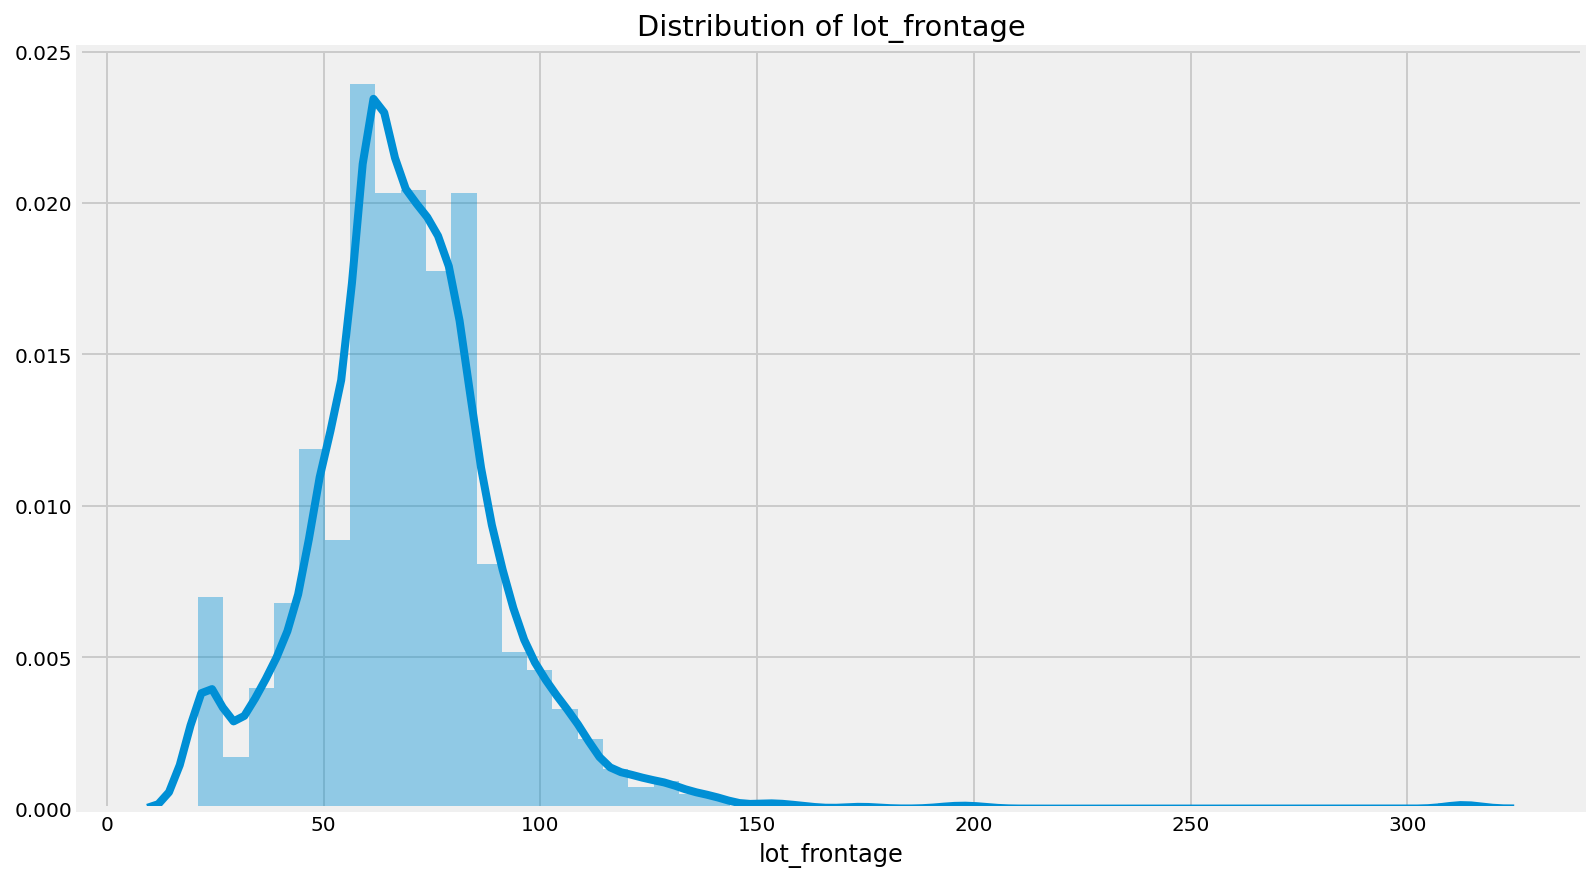

In [24]:
# check distribution of lot_frontage

fig = plt.figure(figsize=(12,7))
sns.distplot(train['lot_frontage'])
plt.title("Distribution of lot_frontage");

print("Mean: {}".format(round(train['lot_frontage'].mean(),2)))
print("Median: {}".format(round(train['lot_frontage'].median(),2)))

Looking at the histogram, `lot_frontage` seems to be normally distributed with positive skewness (right-skewed). As there are a few very large values, it will make more sense to use median values to impute the missing values.

In [25]:
# replace null values with median lot_frontage values

train['lot_frontage'].fillna(train['lot_frontage'].median(), inplace=True)

# check if there are still null values

train['lot_frontage'].isnull().sum()

0

In [26]:
# confirm that null values for garage_yr_blt corresponds to not having a basement

train.loc[train['garage_finish'] == 'None',['garage_yr_blt', 'garage_finish']]

garage_yr_blt garage_finish
28              NaN          None
53              NaN          None
65              NaN          None
79              NaN          None
101             NaN          None
...             ...           ...
1991            NaN          None
2010            NaN          None
2027            NaN          None
2039            NaN          None
2042            NaN          None

[113 rows x 2 columns]

In [27]:
# comparing garage_yr_blt and year_built

train.loc[train['garage_yr_blt'].notnull(), ['garage_yr_blt', 'year_built']]

garage_yr_blt  year_built
0            1976.0        1976
1            1997.0        1996
2            1953.0        1953
3            2007.0        2006
4            1957.0        1900
...             ...         ...
2046         2007.0        2007
2047         1961.0        1940
2048         1929.0        1928
2049         1956.0        1956
2050         1999.0        1999

[1934 rows x 2 columns]

In [28]:
print('{}% of houses have garages that are built in the same year that the house is built.'.
      format(round(len(train[train['year_built'] - train['garage_yr_blt'] == 0])/1934*100 ,2)))

80.71% of houses have garages that are built in the same year that the house is built.


The null values in `garage_yr_blt` are valid as they correspond to the house not having a garage. We can consider dropping this column as we go deeper into our analysis.

In [29]:
# replace mas_vnr_area null values with 0.0

train['mas_vnr_area'].fillna(0.0, inplace=True)

train['mas_vnr_area'].isnull().sum() # confirmed that there's no more null values

0

In [30]:
# check if null bsmt values corresponds to no basement - confirmed this is true

train.loc[train['bsmt_half_bath'].isnull(),['bsmt_half_bath', 'bsmt_full_bath', 'total_bsmt_sf', 'bsmt_unf_sf', 
                                            'bsmtfin_sf_2', 'bsmtfin_sf_1', 'bsmt_qual']]

bsmt_half_bath  bsmt_full_bath  total_bsmt_sf  bsmt_unf_sf  \
616              NaN             NaN            0.0          0.0   
1327             NaN             NaN            NaN          NaN   

      bsmtfin_sf_2  bsmtfin_sf_1 bsmt_qual  
616            0.0           0.0      None  
1327           NaN           NaN      None

In [31]:
# replace null bsmt values with 0.0 - confirmed that it worked

bsmt_replacement_list = ['bsmt_half_bath', 'bsmt_full_bath', 'total_bsmt_sf', 'bsmt_unf_sf',
                         'bsmtfin_sf_2', 'bsmtfin_sf_1']

for col in bsmt_replacement_list:
    train[col] = train[col].fillna(0.0)

In [32]:
# check for null values in train df

train.isnull().sum().sort_values(ascending=False)

garage_yr_blt     113
overall_cond        0
year_remod/add      0
roof_style          0
roof_matl           0
                 ... 
kitchen_qual        0
totrms_abvgrd       0
functional          0
fireplaces          0
id                  0
Length: 81, dtype: int64

We've successful cleaned the train dataset with no null values left except for `garage_yr_blt`. Leaving this column as it is first as it representative of houses without a garage. May eventually drop this column later in the modelling process.

## Data Cleaning: Test Dataset

In [33]:
test.shape

(879, 80)

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               879 non-null    int64  
 1   pid              879 non-null    int64  
 2   ms_subclass      879 non-null    int64  
 3   ms_zoning        879 non-null    object 
 4   lot_frontage     719 non-null    float64
 5   lot_area         879 non-null    int64  
 6   street           879 non-null    object 
 7   alley            58 non-null     object 
 8   lot_shape        879 non-null    object 
 9   land_contour     879 non-null    object 
 10  utilities        879 non-null    object 
 11  lot_config       879 non-null    object 
 12  land_slope       879 non-null    object 
 13  neighborhood     879 non-null    object 
 14  condition_1      879 non-null    object 
 15  condition_2      879 non-null    object 
 16  bldg_type        879 non-null    object 
 17  house_style     

In [35]:
# identifying categorial columns with null values

# creating df for categorial columns with null values
test_obj_nulls = pd.DataFrame(test.isnull().sum()[test.isnull().sum()>0][test.dtypes == 'object'])

# rename df column 
test_obj_nulls.columns = ['number of null values']

print('There are', len(test_obj_nulls),'categorical columns with null values in the test set:')
test_obj_nulls.sort_values(by = 'number of null values', ascending = False)

There are 16 categorical columns with null values in the test set:


number of null values
pool_qc                           875
misc_feature                      838
alley                             821
fence                             707
fireplace_qu                      422
garage_finish                      45
garage_qual                        45
garage_cond                        45
garage_type                        44
bsmt_qual                          25
bsmt_cond                          25
bsmt_exposure                      25
bsmtfin_type_1                     25
bsmtfin_type_2                     25
mas_vnr_type                        1
electrical                          1

In [36]:
# identifying numerical columns with null values

# creating df for numerical columns with null values
test_num_nulls = pd.DataFrame(test.isnull().sum()[test.isnull().sum()>0][test.dtypes != 'object'])

# rename df column 
test_num_nulls.columns = ['number of null values']

print('There are', len(test_num_nulls),'numerical columns with null values in the test set:')
test_num_nulls.sort_values(by = 'number of null values', ascending = False)

There are 3 numerical columns with null values in the test set:


number of null values
lot_frontage                     160
garage_yr_blt                     45
mas_vnr_area                       1

The null values in the test set are similar to the training set with the exception of `electrical`. I will be using the same methods to clean and impute the missing data, splitting them into two parts: categorial and numerical.

**Part 1: Categorical Null Values (Test Set)**

In [37]:
# checking for unique entires in categorical columns

for variable in test_obj_nulls.index:
    print ("'{}' contain these unique entries: {}".format(variable, test[variable].unique()))

'alley' contain these unique entries: ['Grvl' nan 'Pave']
'mas_vnr_type' contain these unique entries: ['None' 'BrkFace' 'Stone' 'BrkCmn' 'CBlock' nan]
'bsmt_qual' contain these unique entries: ['Fa' 'Gd' 'TA' 'Ex' nan 'Po']
'bsmt_cond' contain these unique entries: ['TA' 'Gd' nan 'Fa']
'bsmt_exposure' contain these unique entries: ['No' 'Av' nan 'Mn' 'Gd']
'bsmtfin_type_1' contain these unique entries: ['Unf' 'GLQ' 'BLQ' 'Rec' 'ALQ' nan 'LwQ']
'bsmtfin_type_2' contain these unique entries: ['Unf' 'LwQ' nan 'ALQ' 'GLQ' 'Rec' 'BLQ']
'electrical' contain these unique entries: ['FuseP' 'SBrkr' 'FuseA' 'FuseF' nan]
'fireplace_qu' contain these unique entries: [nan 'Gd' 'Fa' 'TA' 'Po' 'Ex']
'garage_type' contain these unique entries: ['Detchd' 'Attchd' 'BuiltIn' nan '2Types' 'CarPort' 'Basment']
'garage_finish' contain these unique entries: ['Unf' 'Fin' 'RFn' nan]
'garage_qual' contain these unique entries: ['Po' 'TA' 'Fa' nan 'Gd']
'garage_cond' contain these unique entries: ['Po' 'TA' nan

Similar to the train set, all of these variables (except mas_vnr_type and electrical) have "NA" as an entry indicating that the house doesn't have this particular feature (e.g. alley, pool or fence). In these cases, we could infer that the null values mean "NA". To confirm this inference, we will do similar cross-checks across related variables to see if the null values is consistent e.g. bsmt variables and garage variables.

In [38]:
# check pool_qc values

test['pool_qc'].value_counts()

Ex    3
TA    1
Name: pool_qc, dtype: int64

In [39]:
# compare pool_qc values with pool_area

test.loc[test['pool_area'] == 0 ,['pool_area','pool_qc']]

pool_area pool_qc
0            0     NaN
1            0     NaN
2            0     NaN
3            0     NaN
4            0     NaN
..         ...     ...
874          0     NaN
875          0     NaN
876          0     NaN
877          0     NaN
878          0     NaN

[875 rows x 2 columns]

From the above, we can confirm that the null values in pool_qc corresponds to pool_area = 0. We can infer that these houses don't have a pool and replace the null values with "None".

In [40]:
# check fireplace_qc and fireplaces values - corresponds with 422 fireplace_qu null values

test.loc[test['fireplaces']==0, ['fireplaces','fireplace_qu']] 

fireplaces fireplace_qu
0             0          NaN
1             0          NaN
3             0          NaN
5             0          NaN
6             0          NaN
..          ...          ...
866           0          NaN
869           0          NaN
870           0          NaN
873           0          NaN
877           0          NaN

[422 rows x 2 columns]

Similarly, we can confirm that the null values in `fireplace_qu` corresponds to `fireplaces = 0`. We can infer that these houses don't have a fireplace and replace the null values with "None".

In [41]:
# check basement null values

print(test.loc[test['bsmt_exposure'].isnull(),
          ['bsmt_qual', 'bsmt_cond','bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2']].shape,'\n')
print(test.loc[test['bsmt_exposure'].isnull(),
          ['bsmt_qual', 'bsmt_cond','bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2']].head())

# identifying basement rows with values -- none found

test.loc[test['bsmt_exposure'].isnull() & test['bsmt_qual'].notnull(),
          ['bsmt_qual', 'bsmt_cond','bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2']]

(25, 5) 

    bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1 bsmtfin_type_2
15        NaN       NaN           NaN            NaN            NaN
37        NaN       NaN           NaN            NaN            NaN
77        NaN       NaN           NaN            NaN            NaN
79        NaN       NaN           NaN            NaN            NaN
113       NaN       NaN           NaN            NaN            NaN


Empty DataFrame
Columns: [bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_type_2]
Index: []

Based on the above, we can assume that there is no basement for the house if all 5 columns are null and replace the values with "None". 

In [42]:
# check garage null values

print(test.loc[test['garage_finish'].isnull(),
          ['garage_finish', 'garage_qual','garage_cond', 'garage_type', 'garage_yr_blt']].shape,'\n')
print(test.loc[test['garage_finish'].isnull(),
          ['garage_finish', 'garage_qual','garage_cond', 'garage_type', 'garage_yr_blt']].head())

# identifying garage rows with values

test.loc[test['garage_finish'].isnull() & test['garage_type'].notnull(),
          ['garage_finish', 'garage_qual','garage_cond', 'garage_type', 'garage_yr_blt']]

(45, 5) 

    garage_finish garage_qual garage_cond garage_type  garage_yr_blt
29            NaN         NaN         NaN         NaN            NaN
45            NaN         NaN         NaN         NaN            NaN
66            NaN         NaN         NaN         NaN            NaN
68            NaN         NaN         NaN         NaN            NaN
106           NaN         NaN         NaN         NaN            NaN


garage_finish garage_qual garage_cond garage_type  garage_yr_blt
765           NaN         NaN         NaN      Detchd            NaN

Similarly, we can assume that there is no garage for the house if all 5 columns are null and replace the values with "None". This assumption holds true except for row 765. Unlike the training set, we won't be dropping this row and we'll have to find a workaround. 

In [43]:
# check row 765 for all garage columns

test.loc[765,['garage_finish', 'garage_qual','garage_cond', 'garage_type', 'garage_yr_blt',\
              'garage_cars', 'garage_area']]

garage_finish       NaN
garage_qual         NaN
garage_cond         NaN
garage_type      Detchd
garage_yr_blt       NaN
garage_cars           1
garage_area         360
Name: 765, dtype: object

As some of the garage columns are filled, it is likely that this house has a garage. We will be replacing the missing values with mode values in the next step.

In [44]:
# find mode of garage columns for when garage_type = Detchd

test_garage = test.loc[test['garage_type'] == 'Detchd', \
                       ['garage_finish', 'garage_qual','garage_cond', 'garage_yr_blt']]

for col in test_garage.columns:
    print('Mode for', col, ':', test_garage[col].mode().to_list()[0])

Mode for garage_finish : Unf
Mode for garage_qual : TA
Mode for garage_cond : TA
Mode for garage_yr_blt : 1950.0


In [45]:
# fill in missing values for row 765 with mode values

for col in test_garage.columns:
    test.loc[765, col] = test_garage[col].mode().to_list()[0]

# confirm null values have been replaced

test.loc[765,['garage_finish', 'garage_qual','garage_cond', 'garage_type', 'garage_yr_blt',\
              'garage_cars', 'garage_area']]

garage_finish       Unf
garage_qual          TA
garage_cond          TA
garage_type      Detchd
garage_yr_blt      1950
garage_cars           1
garage_area         360
Name: 765, dtype: object

In [46]:
# check mas_vnr_type and mas_vnr_area - confirmed that they're both nully values

test.loc[test['mas_vnr_type'].isnull(), ['mas_vnr_type', 'mas_vnr_area']]

mas_vnr_type  mas_vnr_area
866          NaN           NaN

Similar to the training set, we will be filling `mas_vnr_type` with "None" and `mas_vnr_area` with 0.0.

In [47]:
# check electrical variable

test['electrical'].value_counts()

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: electrical, dtype: int64

In [48]:
# replace missing electrical value with the mode

test['electrical'].fillna('SBrkr', inplace=True)

# confirm that inputation worked

test[test['electrical'].isnull()]

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, 1st_flr_sf, 2nd_flr_sf, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, 3ssn_porch, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type]
Index: []

[0 rows x 80 columns]

In [49]:
# replace all remaining categorical null values with 'None'

test_obj_nulls_list = list(test_obj_nulls.index)

for col in test_obj_nulls_list:
    test[col] = test[col].fillna('None')

test[test_obj_nulls_list].head() #confirm that categorial null values have been replaced with 'None'

alley mas_vnr_type bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
0  Grvl         None        Fa        TA            No            Unf   
1  None         None        Gd        TA            No            Unf   
2  None         None        Gd        Gd            Av            GLQ   
3  None         None        TA        TA            No            Unf   
4  None      BrkFace        Gd        TA            No            BLQ   

  bsmtfin_type_2 electrical fireplace_qu garage_type garage_finish  \
0            Unf      FuseP         None      Detchd           Unf   
1            Unf      SBrkr         None      Attchd           Fin   
2            Unf      SBrkr           Gd      Attchd           RFn   
3            Unf      SBrkr         None      Detchd           Unf   
4            Unf      SBrkr           Gd      Attchd           RFn   

  garage_qual garage_cond pool_qc fence misc_feature  
0          Po          Po    None  None         None  
1          TA          TA    None  None         None  
2          TA          TA    None  None         None  
3          Fa          TA    None  None         None  
4          TA          TA    None  None         None

In [50]:
# confirmed that there are no more categorial null values

test.isnull().sum()[test.isnull().sum()>0][test.dtypes == 'object']

Series([], dtype: int64)

**Part 2: Numerical Null Values (Test Set)**

In [51]:
# review numerical null values again

test.isnull().sum()[test.isnull().sum()>0]

lot_frontage     160
mas_vnr_area       1
garage_yr_blt     44
dtype: int64

As mentioned in the earlier section, the null value in `mas_vnr_area` will be replaced with 0.0. We will use similar methods for `lot_frontage` and `garage_yr_blt` like we did previously in the training set.

In [52]:
# check mean and median for lot_frontage

print("Mean: {}".format(round(test['lot_frontage'].mean(),2)))
print("Median: {}".format(round(test['lot_frontage'].median(),2)))

Mean: 69.63
Median: 68.0


In [53]:
# replace null values with median lot_frontage values (same as what we did in the training set)

test['lot_frontage'].fillna(test['lot_frontage'].median(), inplace=True)

# check if there are still null values

test['lot_frontage'].isnull().sum()

0

In [54]:
# replace mas_vnr_area null values with 0.0

test['mas_vnr_area'].fillna(0.0, inplace=True)

test['mas_vnr_area'].isnull().sum() # confirmed that there's no more null values

0

In [55]:
# check that null values for garage_yr_blt corresponds to not having a basement 

len(test[test['garage_finish'] == 'None']) #confirmed that it's true

44

In [56]:
# review all nulls in test set

test.isnull().sum()[test.isnull().sum()>0]

garage_yr_blt    44
dtype: int64

Similar to the training set, we will leave the `garage_yr_blt` as is for now. 

## Data Cleaning: Outliers

Note from the author in [data documentation](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt): 

"There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students."  

This makes sense and we will look into the outliers.

In [57]:
# scatterplot for saleprice vs gr_liv_area in train set

fig = px.scatter(train, 
                 x = 'gr_liv_area', 
                 y = 'saleprice', 
                 width = 900, 
                 height = 500, 
                 title = "Scatterplot: saleprice vs gr_liv_area (train set)")
fig.show()

From the graph, we can clearly see the 2 outliers that have >4000 `gr_liv_area`.

In [58]:
# confirm the 2 rows for the outliers in the train set

train[train['gr_liv_area'] > 4000]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
960   1499  908154235           60        RL         313.0     63887   Pave   
1885  2181  908154195           20        RL         128.0     39290   Pave   

     alley lot_shape land_contour  ... screen_porch pool_area pool_qc fence  \
960   None       IR3          Bnk  ...            0       480      Gd  None   
1885  None       IR1          Bnk  ...            0         0    None  None   

     misc_feature misc_val mo_sold yr_sold  sale_type  saleprice  
960          None        0       1    2008        New     160000  
1885         Elev    17000      10    2007        New     183850  

[2 rows x 81 columns]

In [59]:
# check if the test set for similar outliers (gr_liv_area > 4000)

test[test['gr_liv_area'] > 4000]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
76   2182  908154205           60        RL         130.0     40094   Pave   
171  1761  528320050           60        RL         160.0     15623   Pave   
464  1768  528351010           60        RL         104.0     21535   Pave   

    alley lot_shape land_contour  ... 3ssn_porch screen_porch pool_area  \
76   None       IR1          Bnk  ...          0            0         0   
171  None       IR1          Lvl  ...          0            0       555   
464  None       IR1          Lvl  ...          0            0         0   

    pool_qc  fence misc_feature misc_val mo_sold  yr_sold  sale_type  
76     None   None         None        0      10     2007        New  
171      Ex  MnPrv         None        0       7     2007        WD   
464    None   None         None        0       1     2007        WD   

[3 rows x 80 columns]

There are 3 observations in the test set with >4000 `gr_liv_area`. We won't be removing these observations but will be noting this for modelling. As for our train set, we will be removing both rows.

In [60]:
# remove outliers from train set

train.drop([960, 1885], axis=0, inplace=True)

# confirm that outliers have been removed

train[train['gr_liv_area'] > 4000]

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, 1st_flr_sf, 2nd_flr_sf, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, 3ssn_porch, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type, saleprice]
Index: []

[0 rows x 81 columns]

In [61]:
# final shape of train and test sets

print('Train:', train.shape)
print('Test:', test.shape)

Train: (2045, 81)
Test: (879, 80)


Cleaning is completed and we can export the cleaned datasets next:

### Export Datasets

In [62]:
train.to_csv('../datasets/train_cleaned.csv', index=False)

test.to_csv('../datasets/test_cleaned.csv', index=False)

## Feature Distributions 

In [63]:
# list with only categorical columns
col_categorical = [col for col in train.columns if train[col].dtype == np.object]

# list with only numerical columns
col_numerical = [col for col in train.columns if train[col].dtype != np.object]

### Histogram (of categorical columns)

Exploratory insights from the histogram subplots below:
- Many of the categorical columns are highly skewed by a particular type (e.g. alley, land_contour, land_slope), with very little representation of the other categories. 
- Some categorical columns can also be converted to nominal variables (e.g. street) or ordinal variables (e.g. bsmt_qual, bsmt_cond).

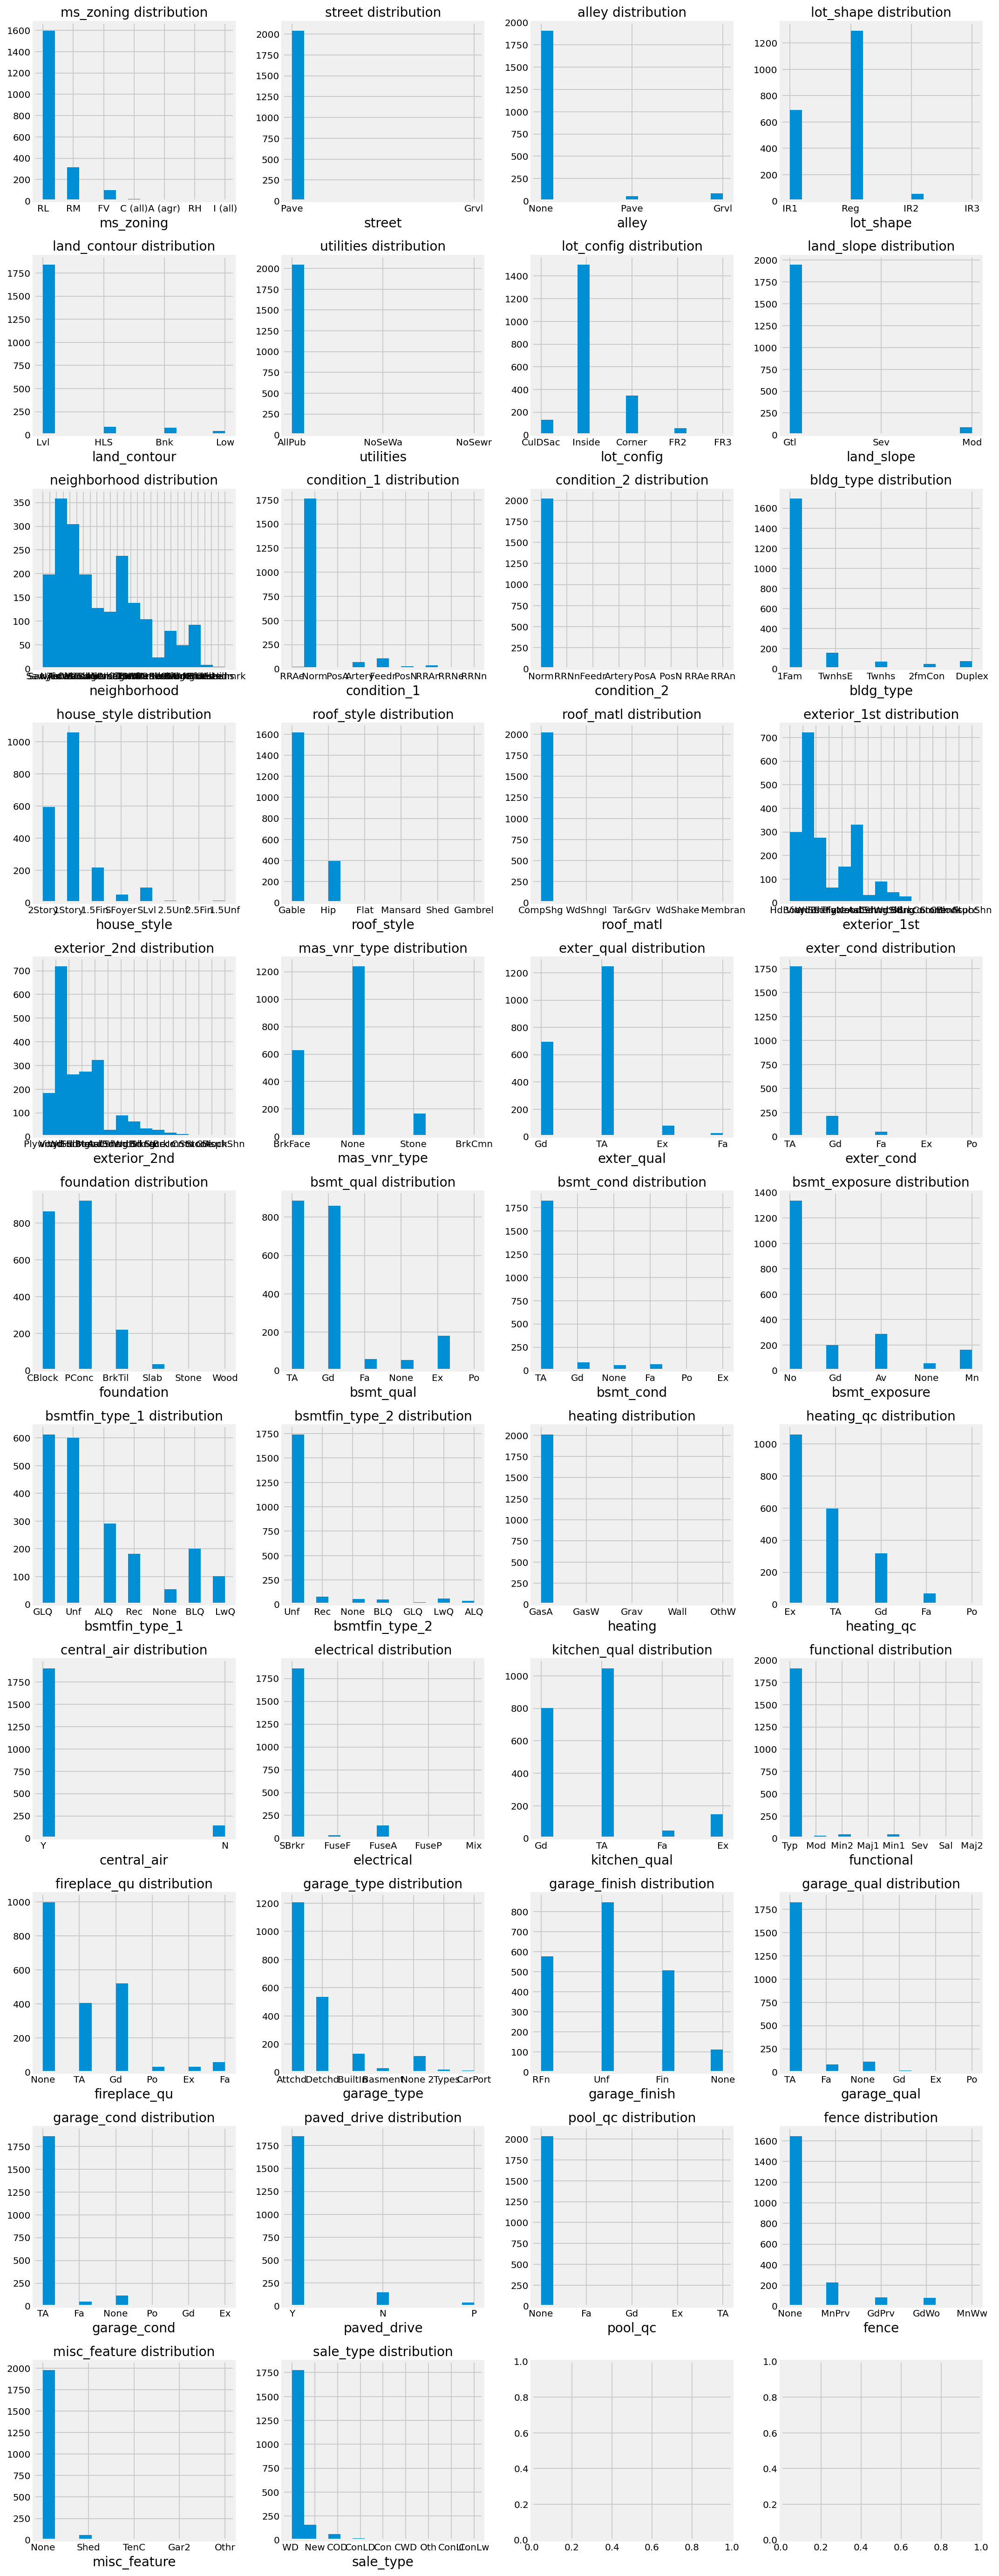

In [64]:
# plot histogram subplots (categorical variables)

nrows = int(np.ceil(len(col_categorical)/4)) 
fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize=(15, nrows*3.5)) 
ax = ax.ravel() 
for i, column in enumerate(col_categorical): 
    ax[i].hist(train[column],bins=15)
    ax[i].set_title(f'{column} distribution', fontsize=14)
    ax[i].tick_params(labelsize=10)
    ax[i].set_xlabel(column, fontsize=14)

plt.tight_layout();

### Scatterplots (of numerical columns)

Exploratory insights from the scatterplot subplots below:
- There seems to be positive linear relationships between `saleprice` and various features (e.g. year_built, overall_qual, total_bsmt_sf, gr_live_area). This makes sense as they're in relation to the size, quality and condition of the houses.
- There are a couple of obvious outliers which may be removed in feature engineering.

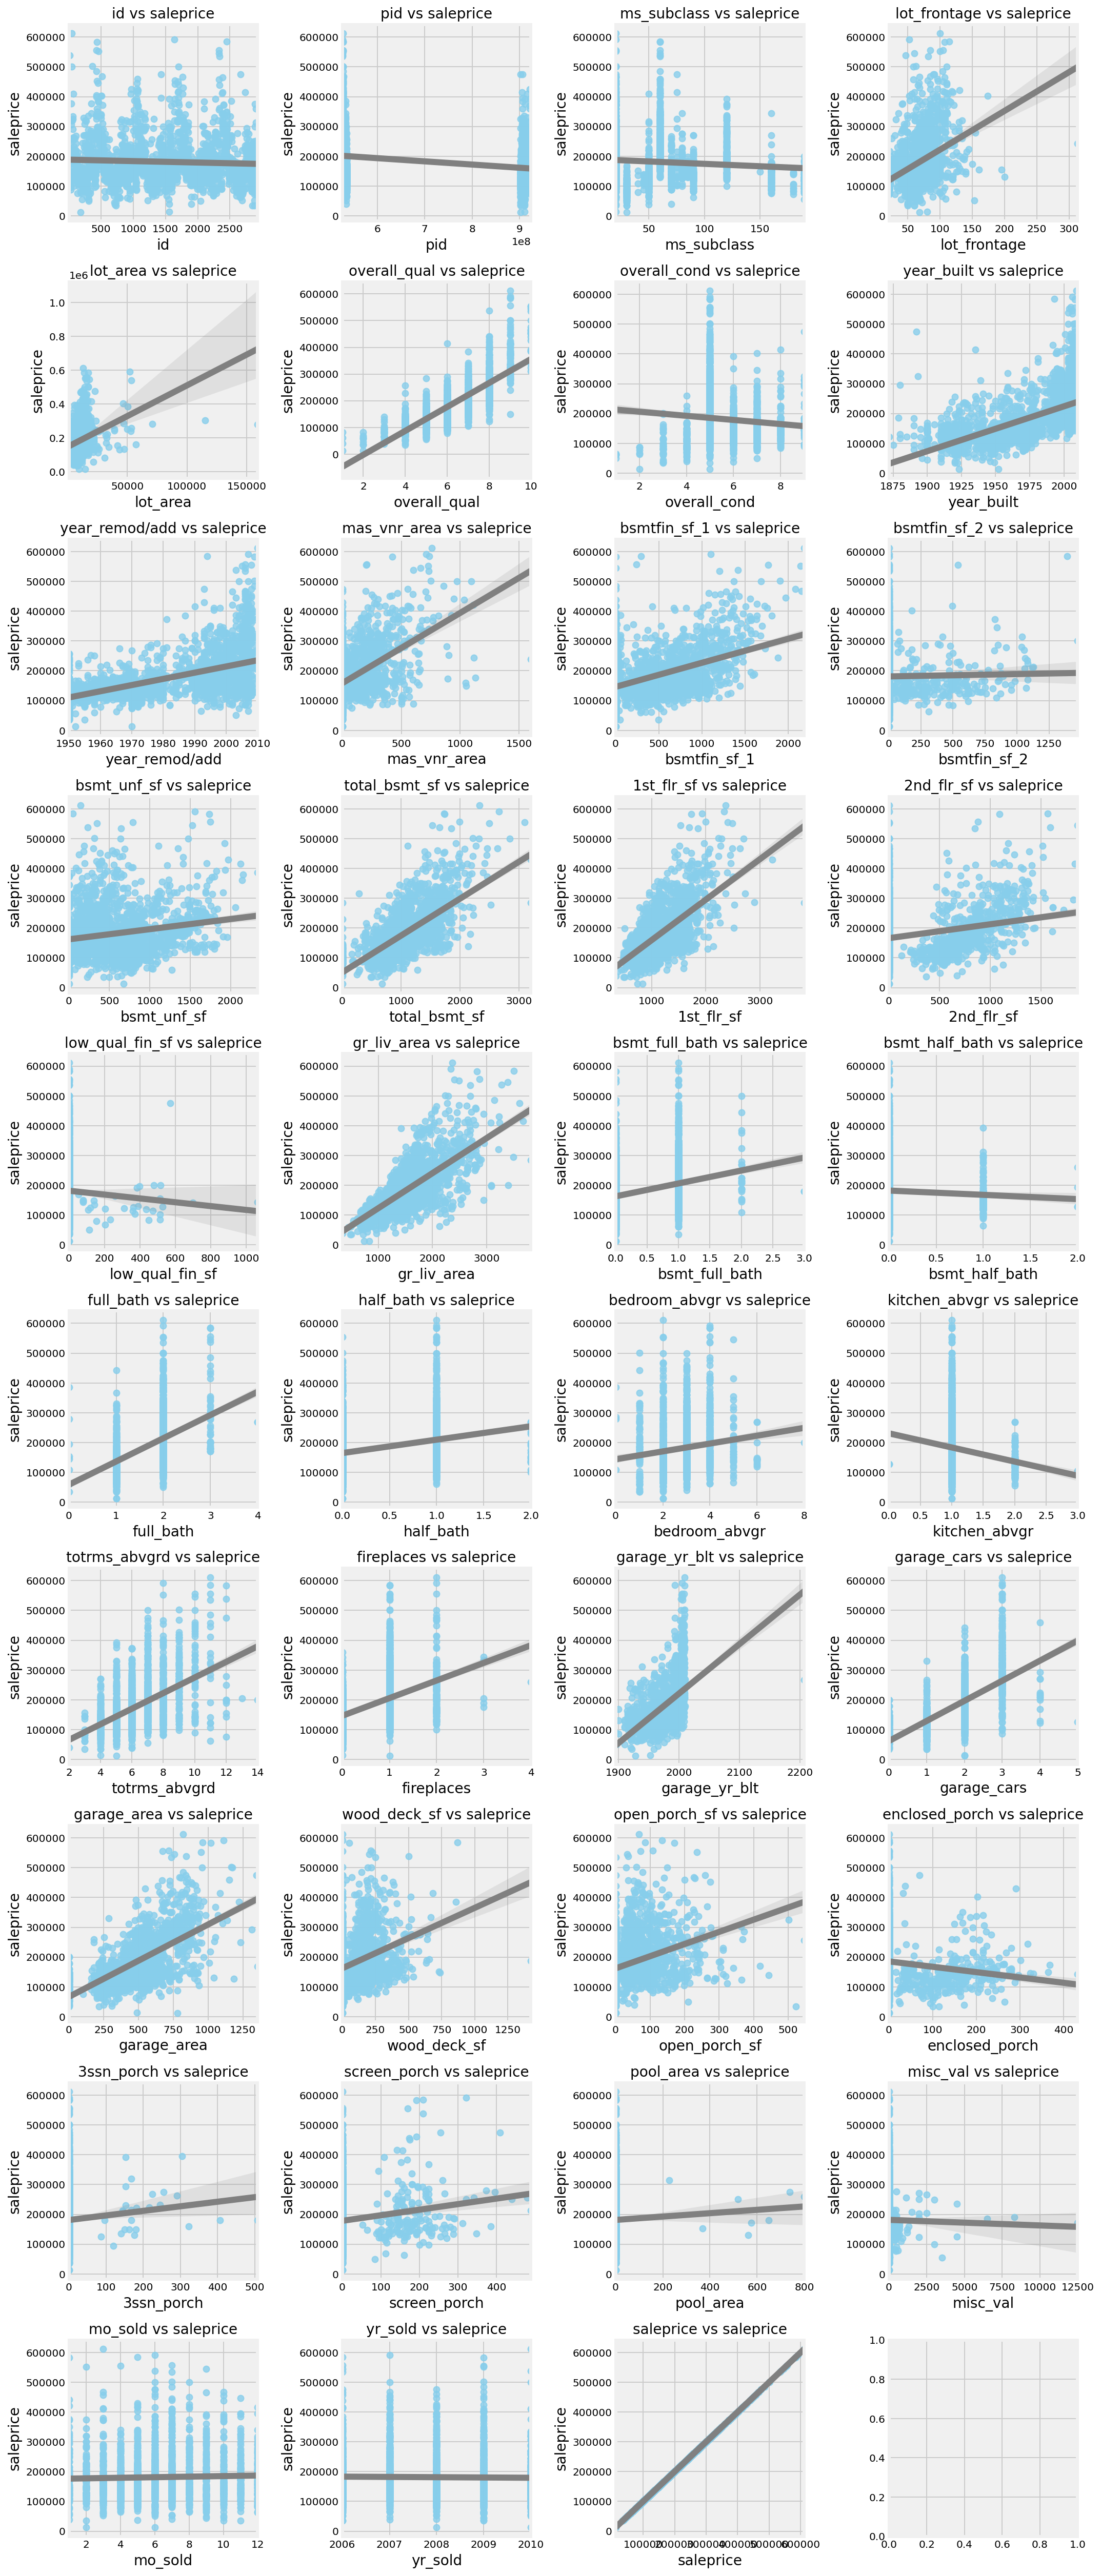

In [65]:
# plot scatterplot subplots (numerical variables)

nrows = int(np.ceil(len(col_numerical)/4)) 
fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 
ax = ax.ravel() 
for i, column in enumerate(col_numerical):
    sns.regplot(y=train.saleprice, x=train[column],ax=ax[i], \
                scatter_kws = {'facecolors':'skyblue','edgecolor':'skyblue'},
                line_kws = {'color':'grey'})
    ax[i].set_title(f'{column} vs saleprice',fontsize=14)
    ax[i].tick_params(labelsize=10)
    ax[i].set_xlabel(column, fontsize=14)
    ax[i].set_ylabel('saleprice', fontsize=14)
    
plt.tight_layout();

### Heatmap (of numerical columns)

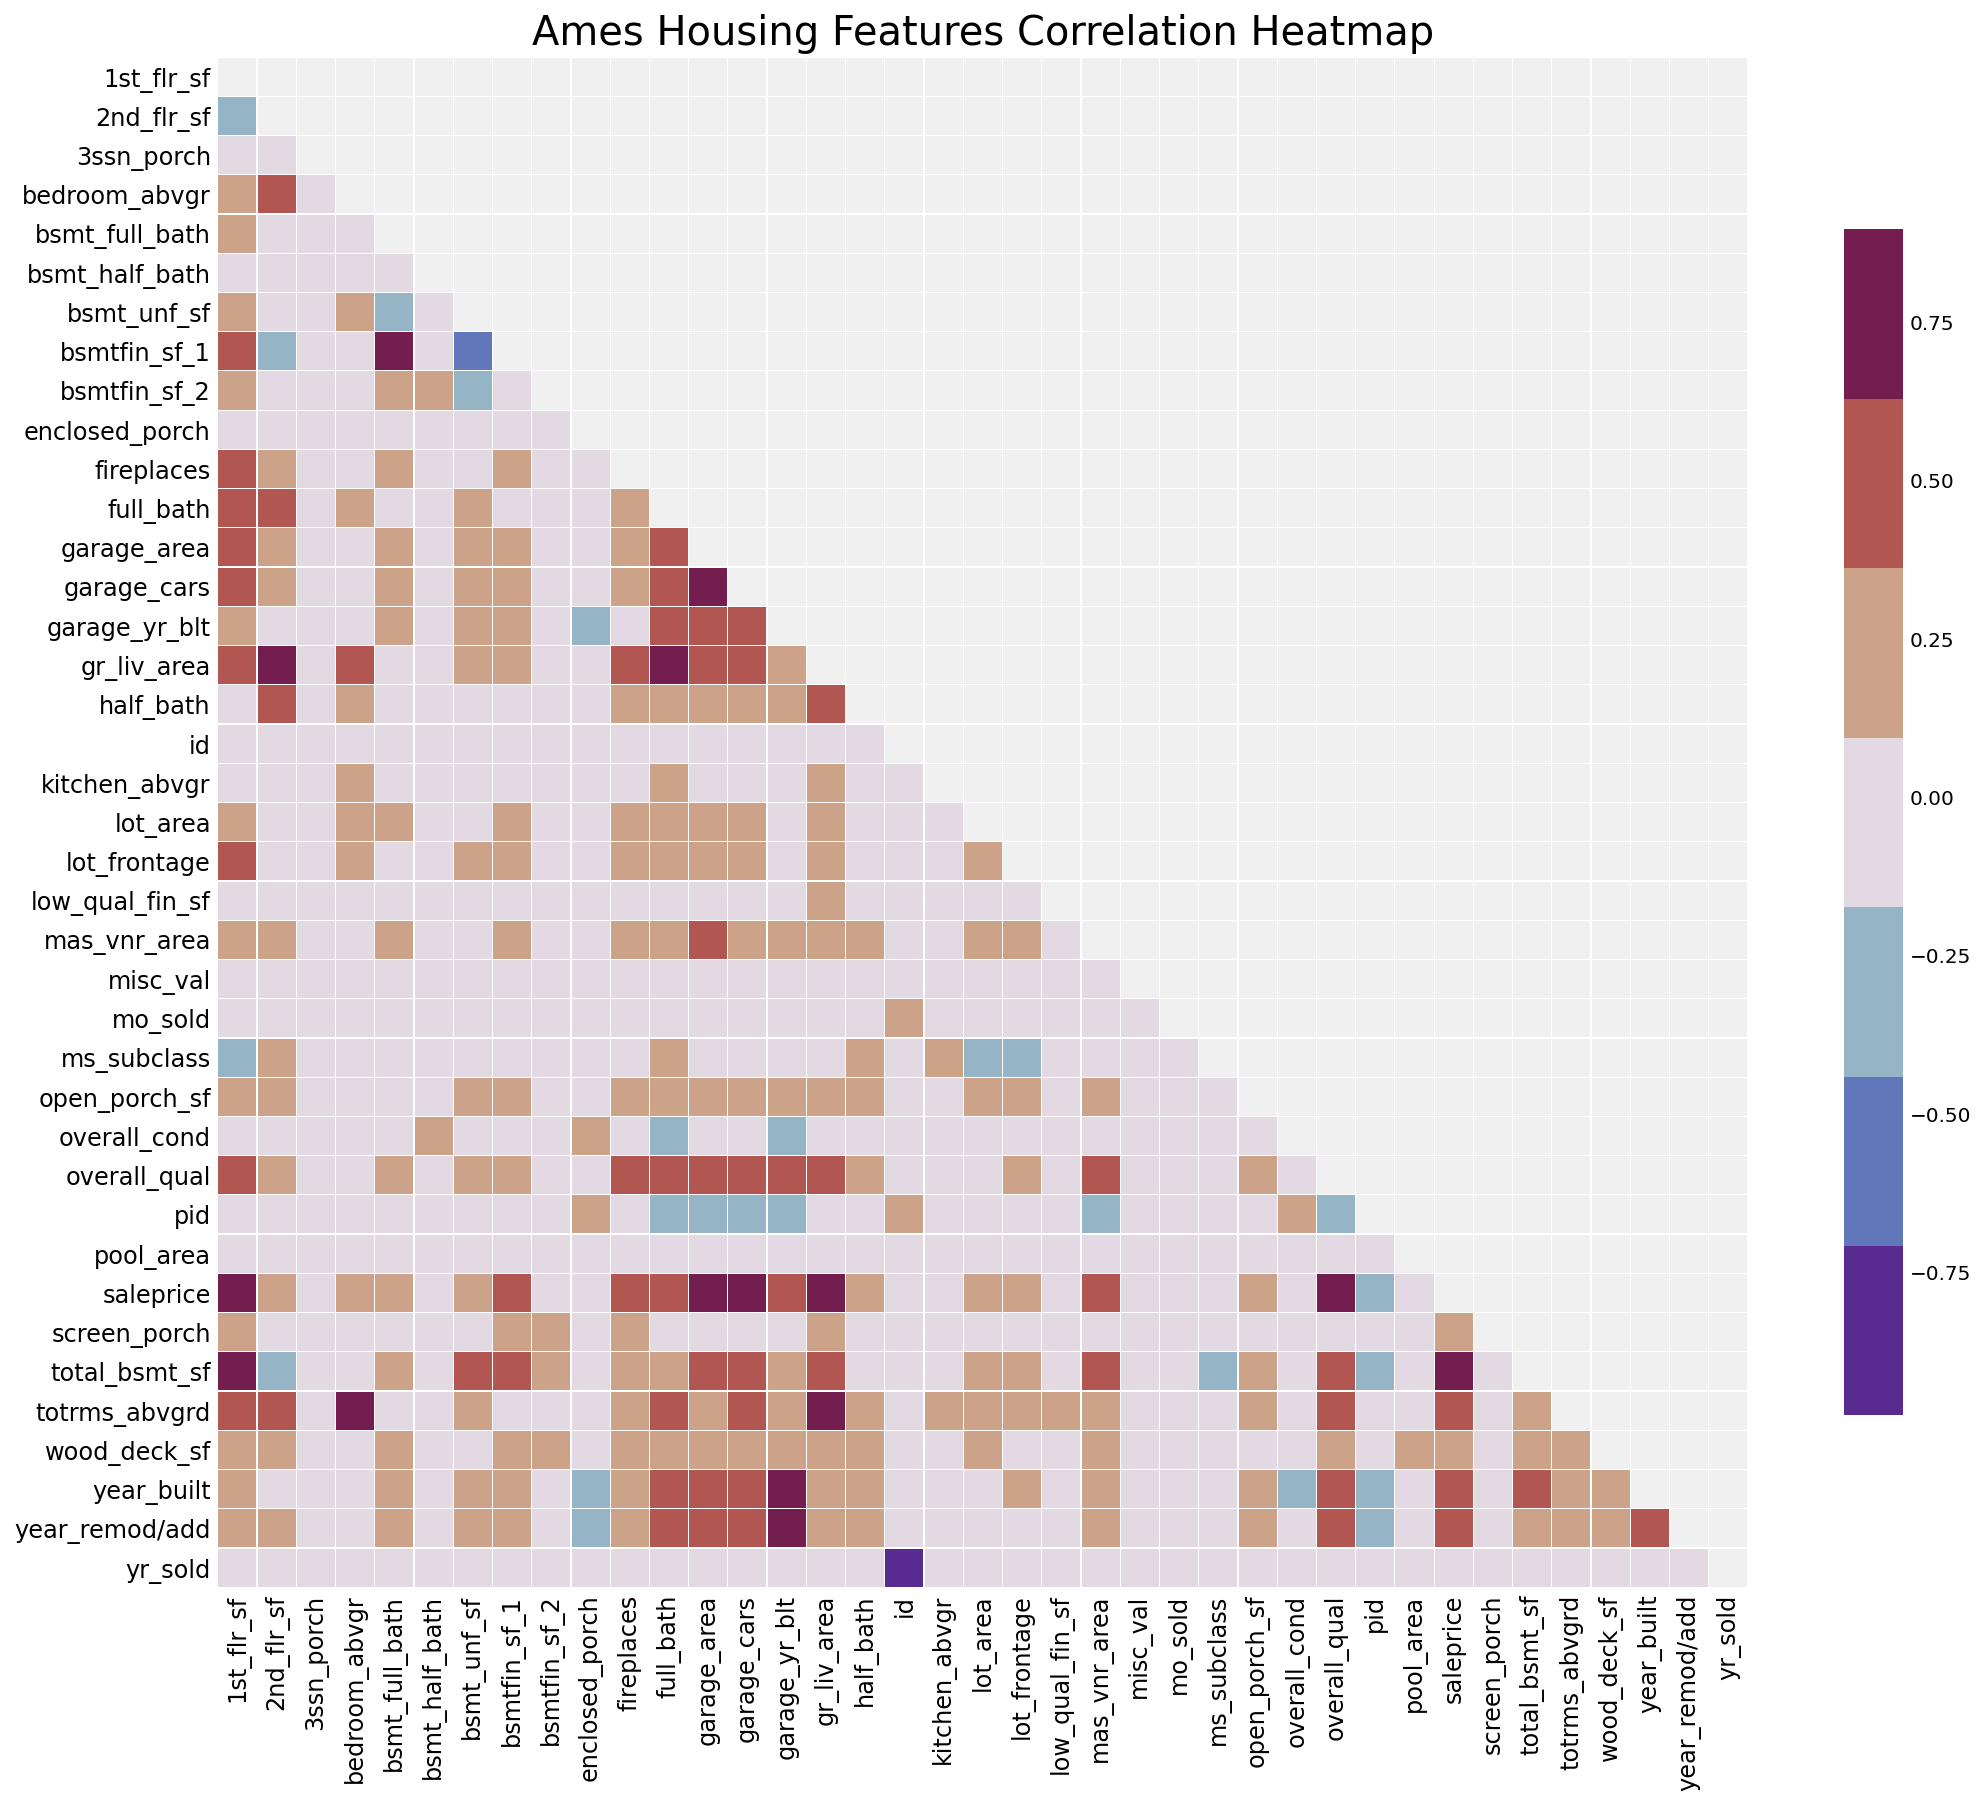

In [66]:
# order columns
train_copy = train[train.columns.sort_values()]

# plot heatmap

# set up mask to be "True" in the upper triangle
mask = np.zeros_like(train_copy.corr())
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(train_copy.corr(),
            mask = mask,
            square = True,
            linewidth = 0.1,
            cbar_kws = {'shrink':0.6},
            cmap = sns.color_palette("twilight_shifted", 7))

ax.tick_params(labelsize=12)

plt.title("Ames Housing Features Correlation Heatmap",fontsize=20)

plt.tight_layout();

From the heatmap above, it looks like there are some variables that are highly correlated with one another.

- `1st_flr_sf` and `total_bsmt_sf`: since first floor is above the basement, they likely have the same size)


- `garage_cars` and `garage_area`: the larger the garage area, the more cars that can fit in it


- `totrms_abvgrd` and `gr_living_area`: total rooms above ground increases with living area


- `saleprice` and `1st_flr_sf`/`total_bsmt_sf`/`overall_qual`: this makes sense as price would increase with the size and quality of the house

### Heatmap (including dummy-encoded features)

In [67]:
# one-hot encode categorical columns
train_dummies = pd.get_dummies(train_copy, drop_first = True)

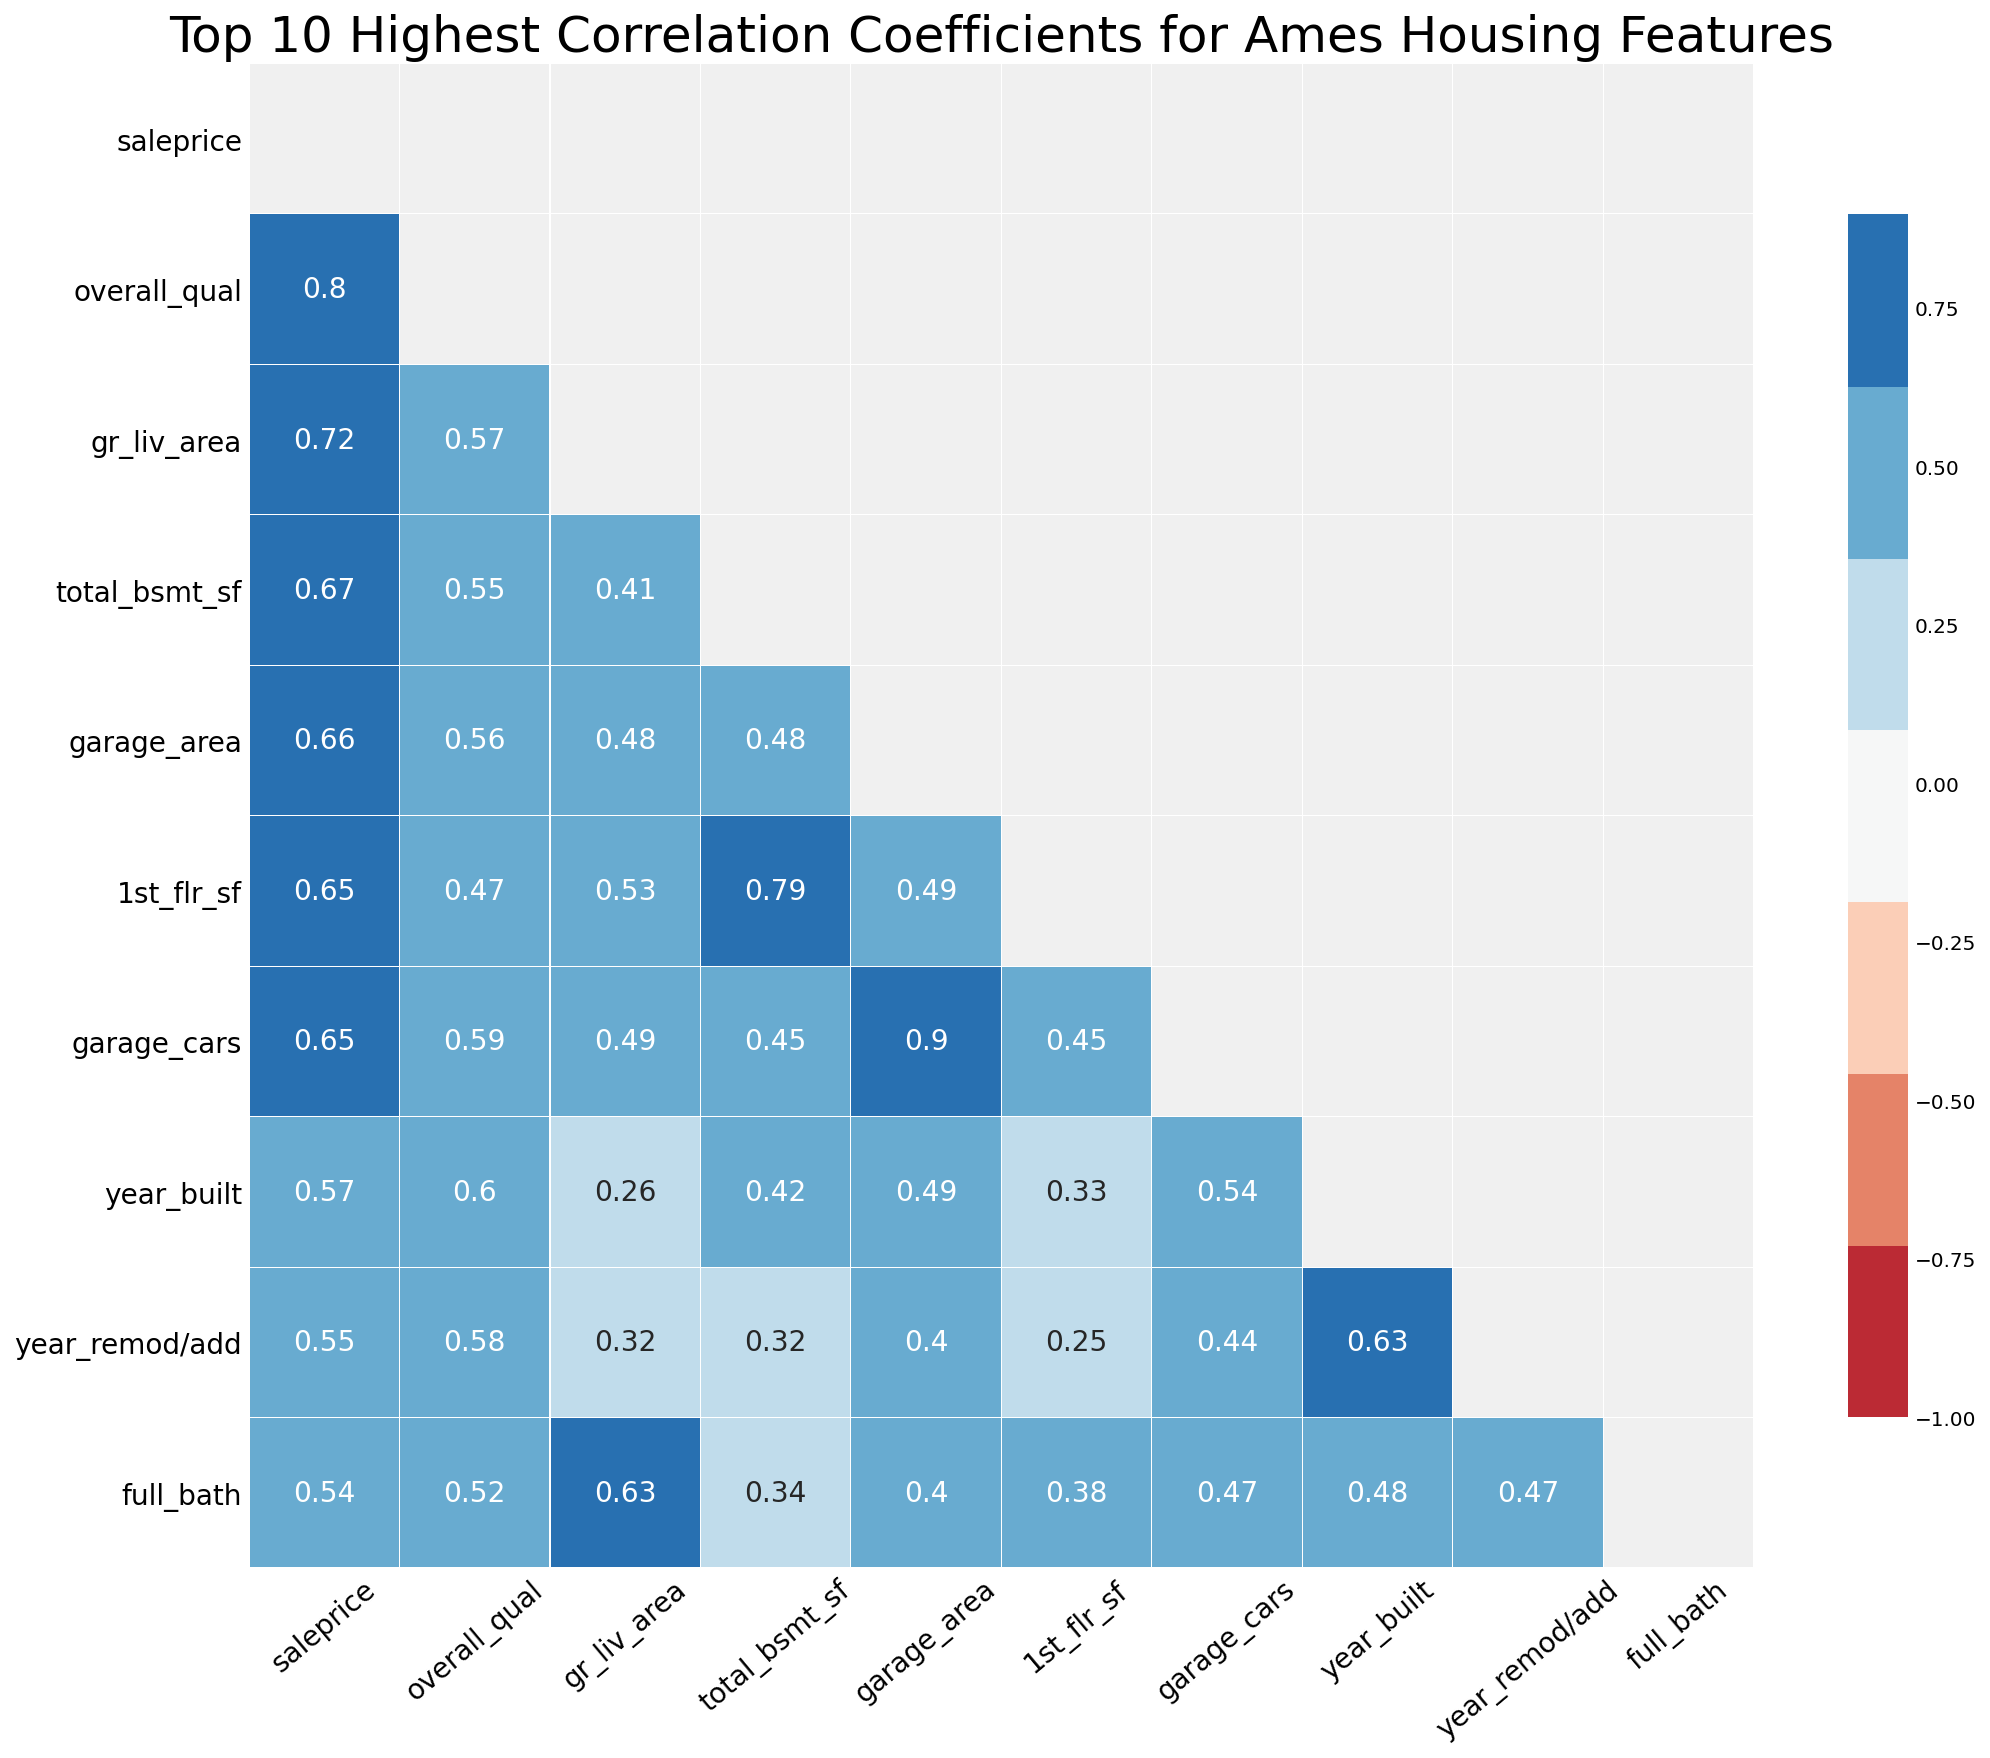

In [68]:
# get index of columns with 10 highest correlation coefficients wrt saleprice
corr_cols = train_dummies.corr().nlargest(10, 'saleprice').index

# plot heatmap

# set up mask to be "True" in the upper triangle
mask = np.zeros_like(train_dummies[corr_cols].corr())
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(15, 15))
sns.heatmap(train_dummies[corr_cols].corr(), 
            mask = mask,
            square = True,
            linewidth = 0.1,
            cbar_kws={"shrink": 0.6},
            cmap = sns.color_palette("RdBu", 7),
            annot = True, 
            annot_kws = {'size': 14},
            yticklabels = corr_cols.values, 
            xticklabels = corr_cols.values,
            vmin = -1)

plt.xticks(size=14, rotation=40)
plt.yticks(size=14)

plt.title('Top 10 Highest Correlation Coefficients for Ames Housing Features', fontsize=25)

plt.tight_layout();

Drilling down further into the top 10 features with the highest correlation coefficient with `saleprice`. All 10 features are positively correlated with `saleprice` with `overall_qual` at the top with a correlation coefficient of 0.8.

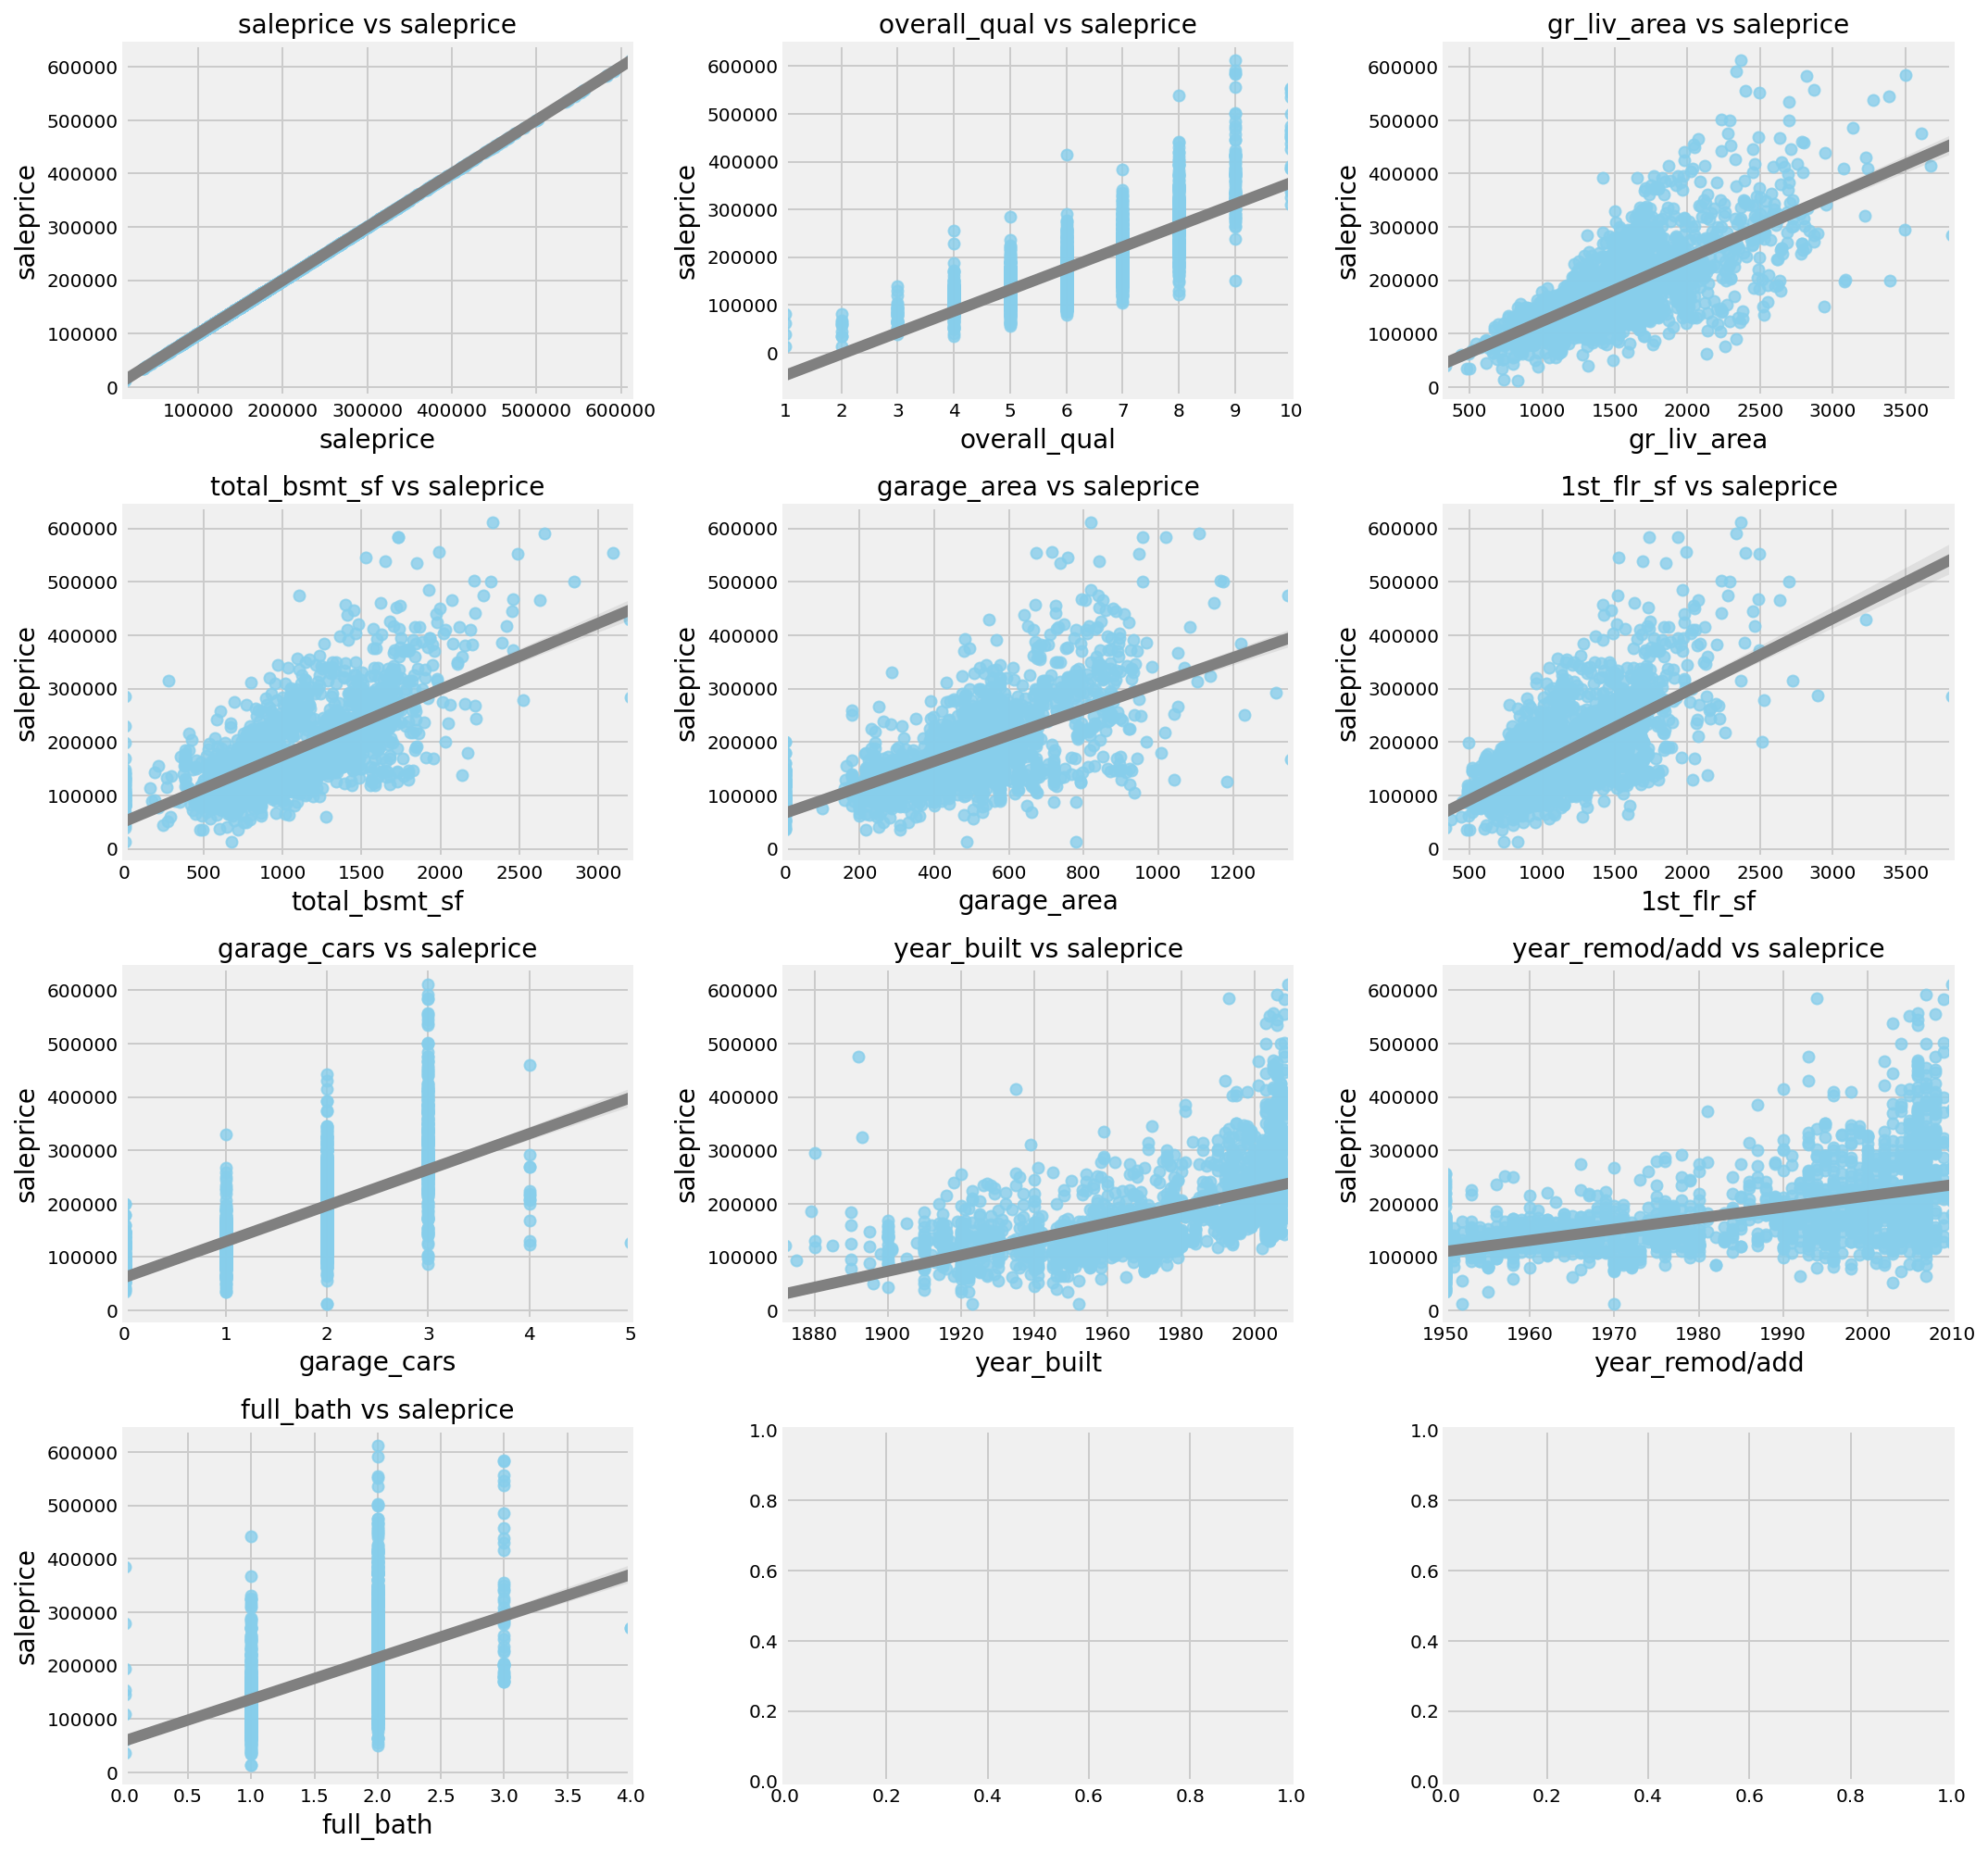

In [69]:
# plot scatterplot subplots for 10 highest correlation coefficients wrt saleprice
# for presentation

nrows = int(np.ceil(len(corr_cols)/3)) 
fig, ax = plt.subplots(nrows=nrows, ncols=3,figsize=(15, nrows*3.5)) 
ax = ax.ravel() 
for i, column in enumerate(corr_cols):
    sns.regplot(y=train.saleprice, x=train[column],ax=ax[i], \
                scatter_kws = {'facecolors':'skyblue','edgecolor':'skyblue'},
                line_kws = {'color':'grey'})
    ax[i].set_title(f'{column} vs saleprice',fontsize=14)
    ax[i].tick_params(labelsize=10)
    ax[i].set_xlabel(column, fontsize=14)
    ax[i].set_ylabel('saleprice', fontsize=14)
    
plt.tight_layout();

### Exploring Neighborhoods

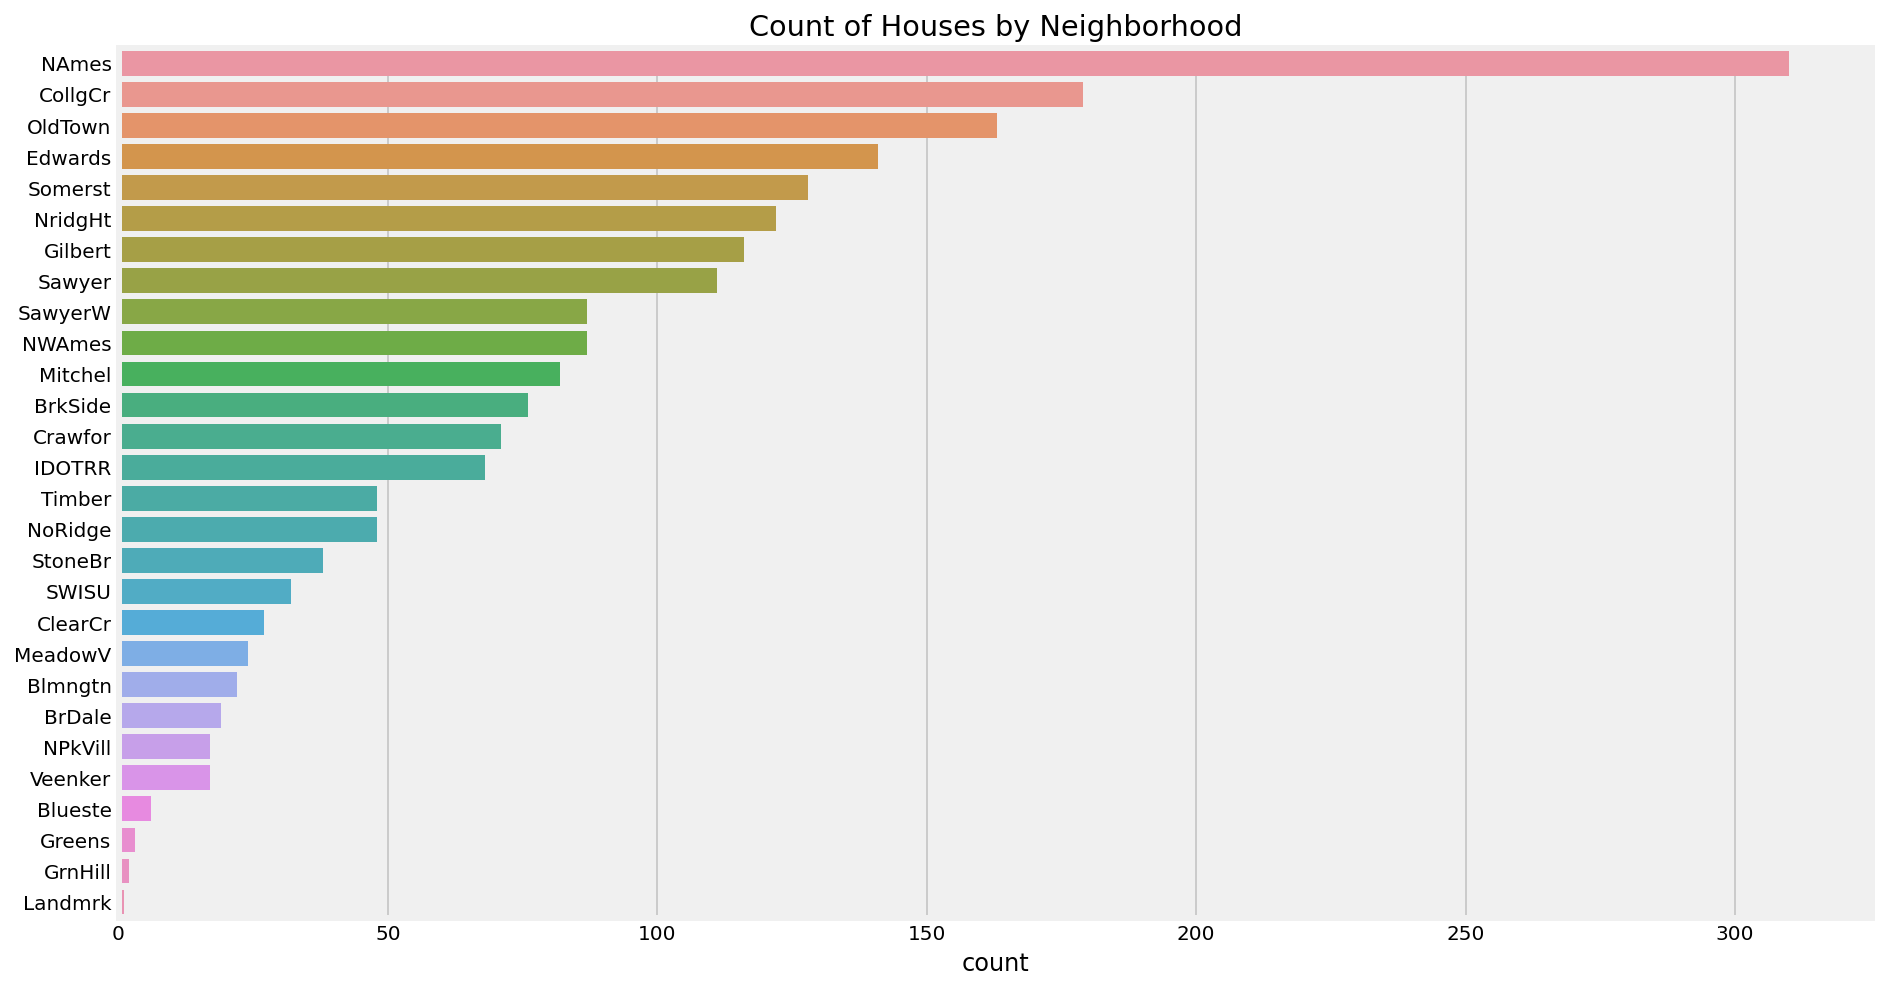

In [70]:
# visualizing neighborhoods

train_nbh = pd.DataFrame(train['neighborhood'].value_counts())
train_nbh.rename(columns = {'neighborhood':'count'}, inplace=True)

fig = plt.figure(figsize=(14,8))

sns.barplot(train_nbh['count'], 
            train_nbh.index, 
            orient = "h").set_title('Count of Houses by Neighborhood');

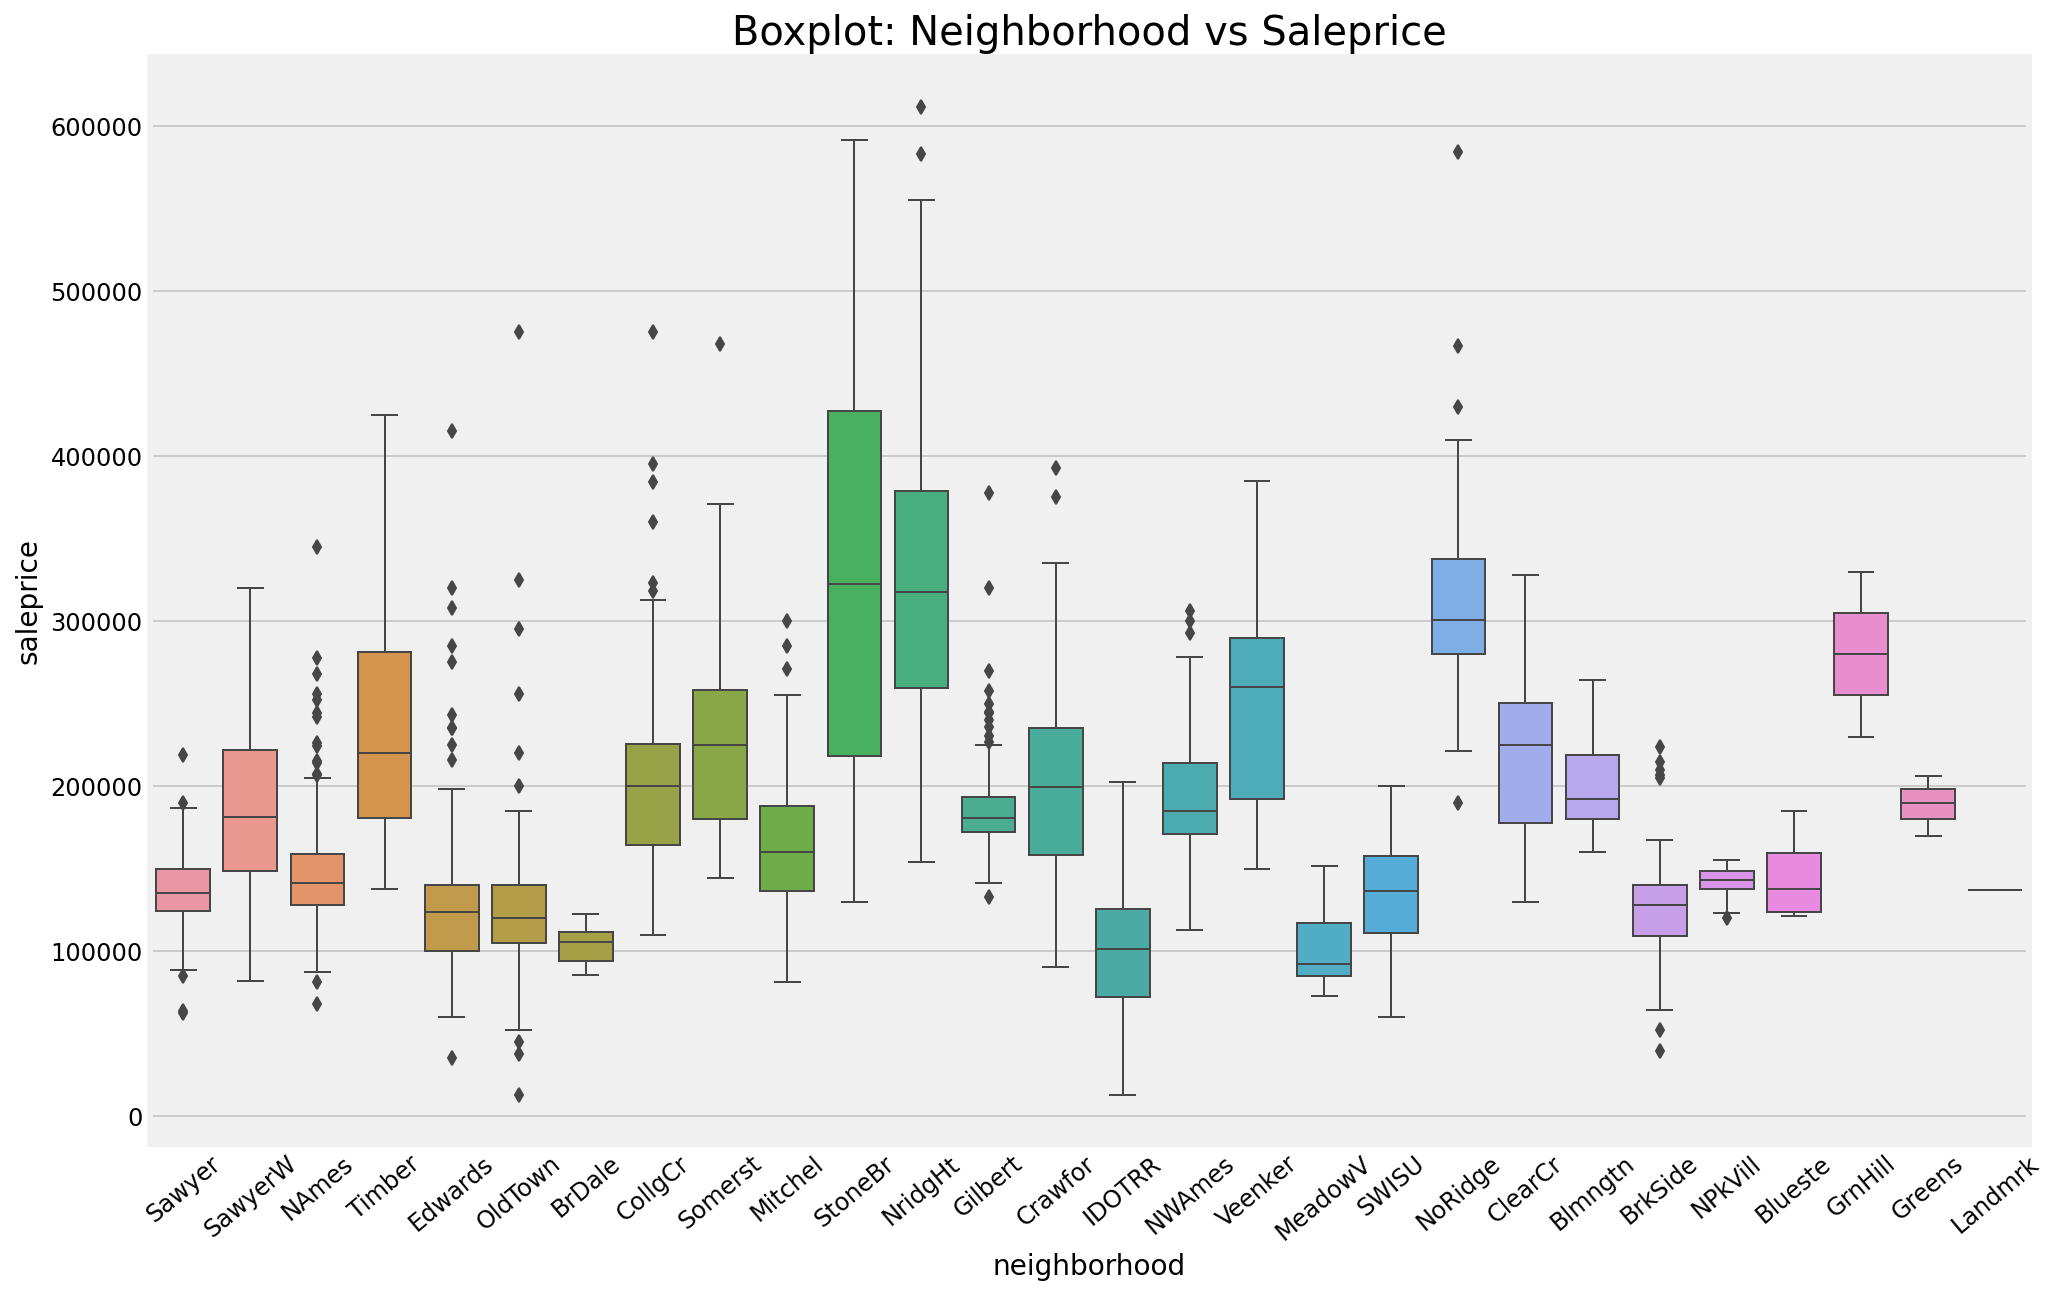

In [71]:
# plot boxplot for relationship between neighborhood and sale price

fig = plt.figure(figsize=(15,10))

sns.boxplot(x='neighborhood', y='saleprice', data=train, linewidth=1.0);
plt.xticks(rotation=40, size=12)
plt.yticks(size=12)
plt.xlabel('neighborhood', size=14)
plt.ylabel('saleprice', size=14)
plt.title('Boxplot: Neighborhood vs Saleprice', size=20);

Based on the boxplots above, it is evident that neighborhood plays a role in the saleprice of a house. Neighborhoods like StoneBr and NridgHt have higher prices than the rest of the neighborhoods.

### Exploring Dwelling Type

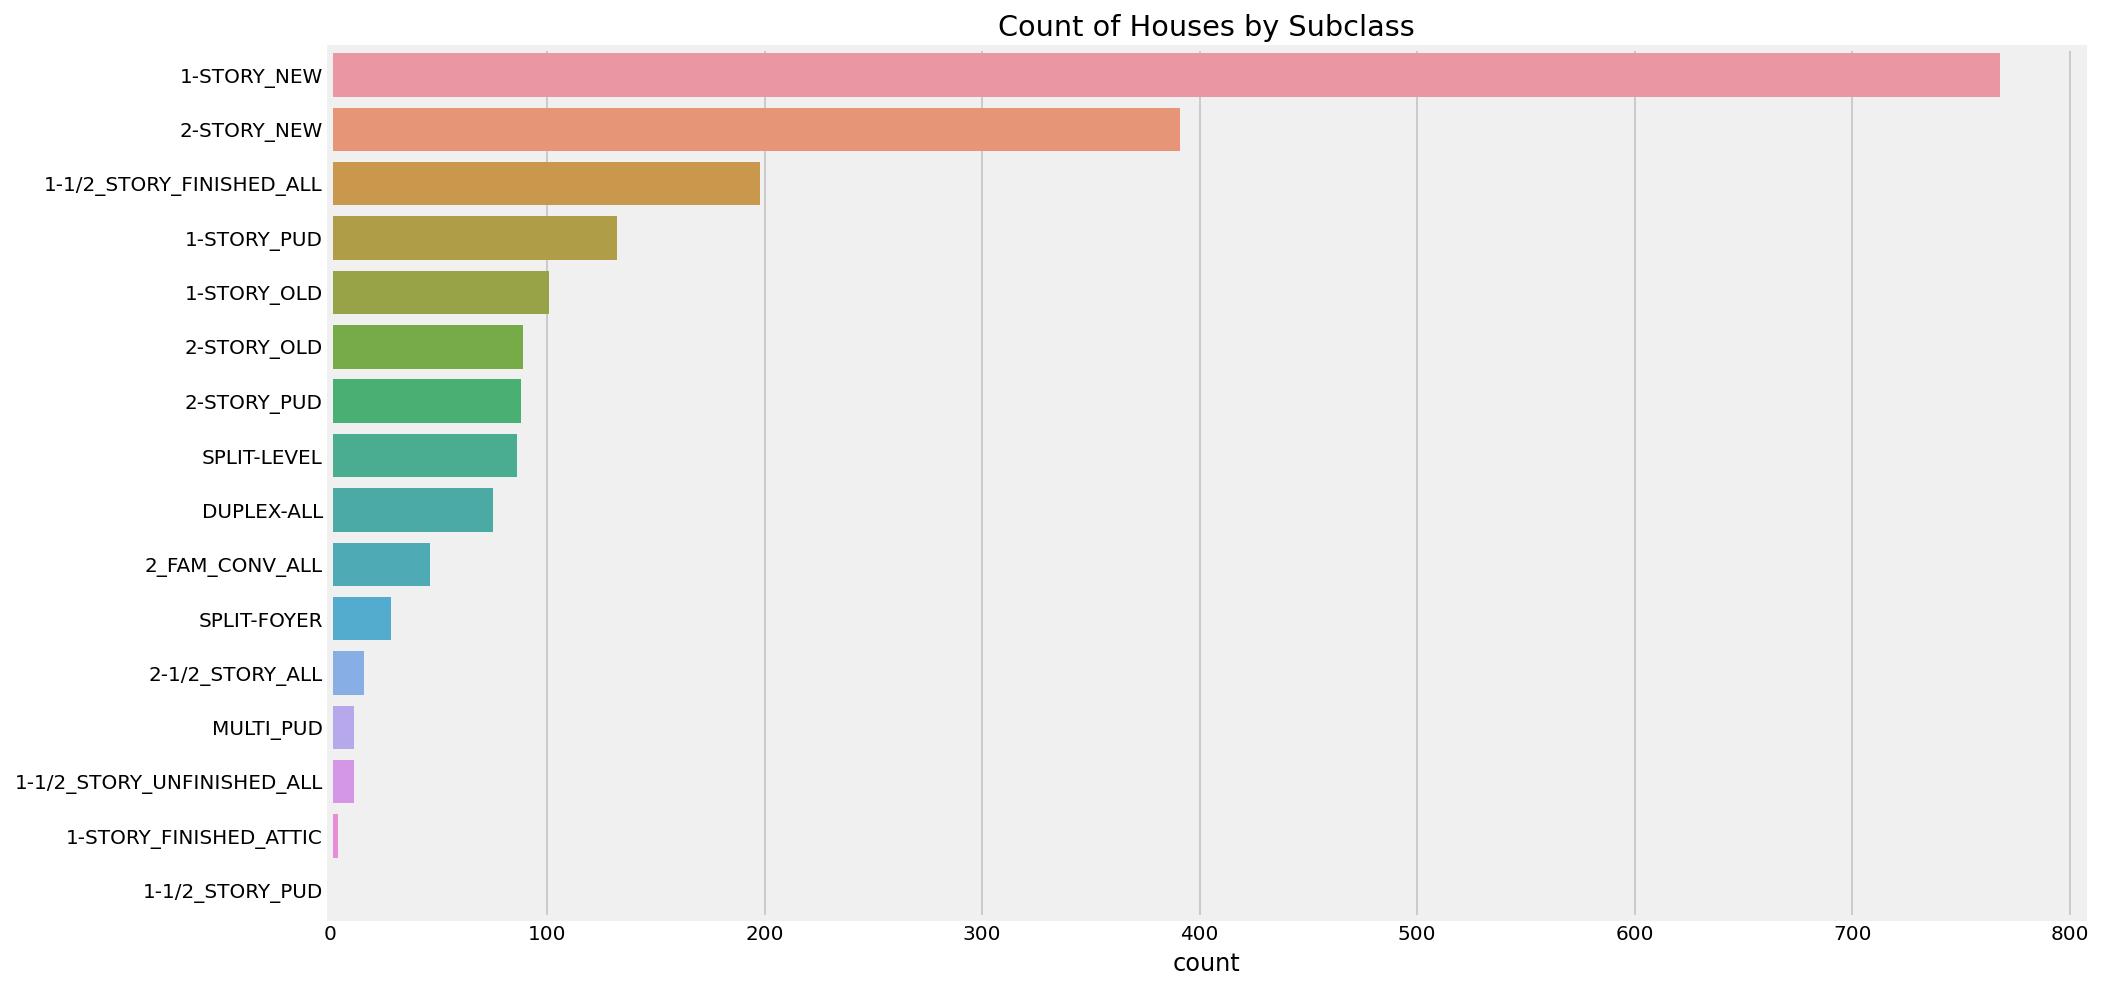

In [74]:
# visualizing dwelling type

ms_subclass_di = {20: '1-STORY_NEW', 
                  30: '1-STORY_OLD', 
                  40: '1-STORY_FINISHED_ATTIC', 
                  45: '1-1/2_STORY_UNFINISHED_ALL',
                  50: '1-1/2_STORY_FINISHED_ALL', 
                  60: '2-STORY_NEW',
                  70: '2-STORY_OLD', 
                  75: '2-1/2_STORY_ALL',
                  80: 'SPLIT-LEVEL', 
                  85: 'SPLIT-FOYER',
                  90: 'DUPLEX-ALL', 
                  120: '1-STORY_PUD',
                  150: '1-1/2_STORY_PUD',
                  160: '2-STORY_PUD',
                  180: 'MULTI_PUD',
                  190: '2_FAM_CONV_ALL'}



train_ms = pd.DataFrame(train['ms_subclass'].map(ms_subclass_di).value_counts())
train_ms.rename(columns = {'ms_subclass':'count'}, inplace=True)

fig = plt.figure(figsize=(14,8))

sns.barplot(train_ms['count'], 
            train_ms.index, 
            orient = "h").set_title('Count of Houses by Subclass');

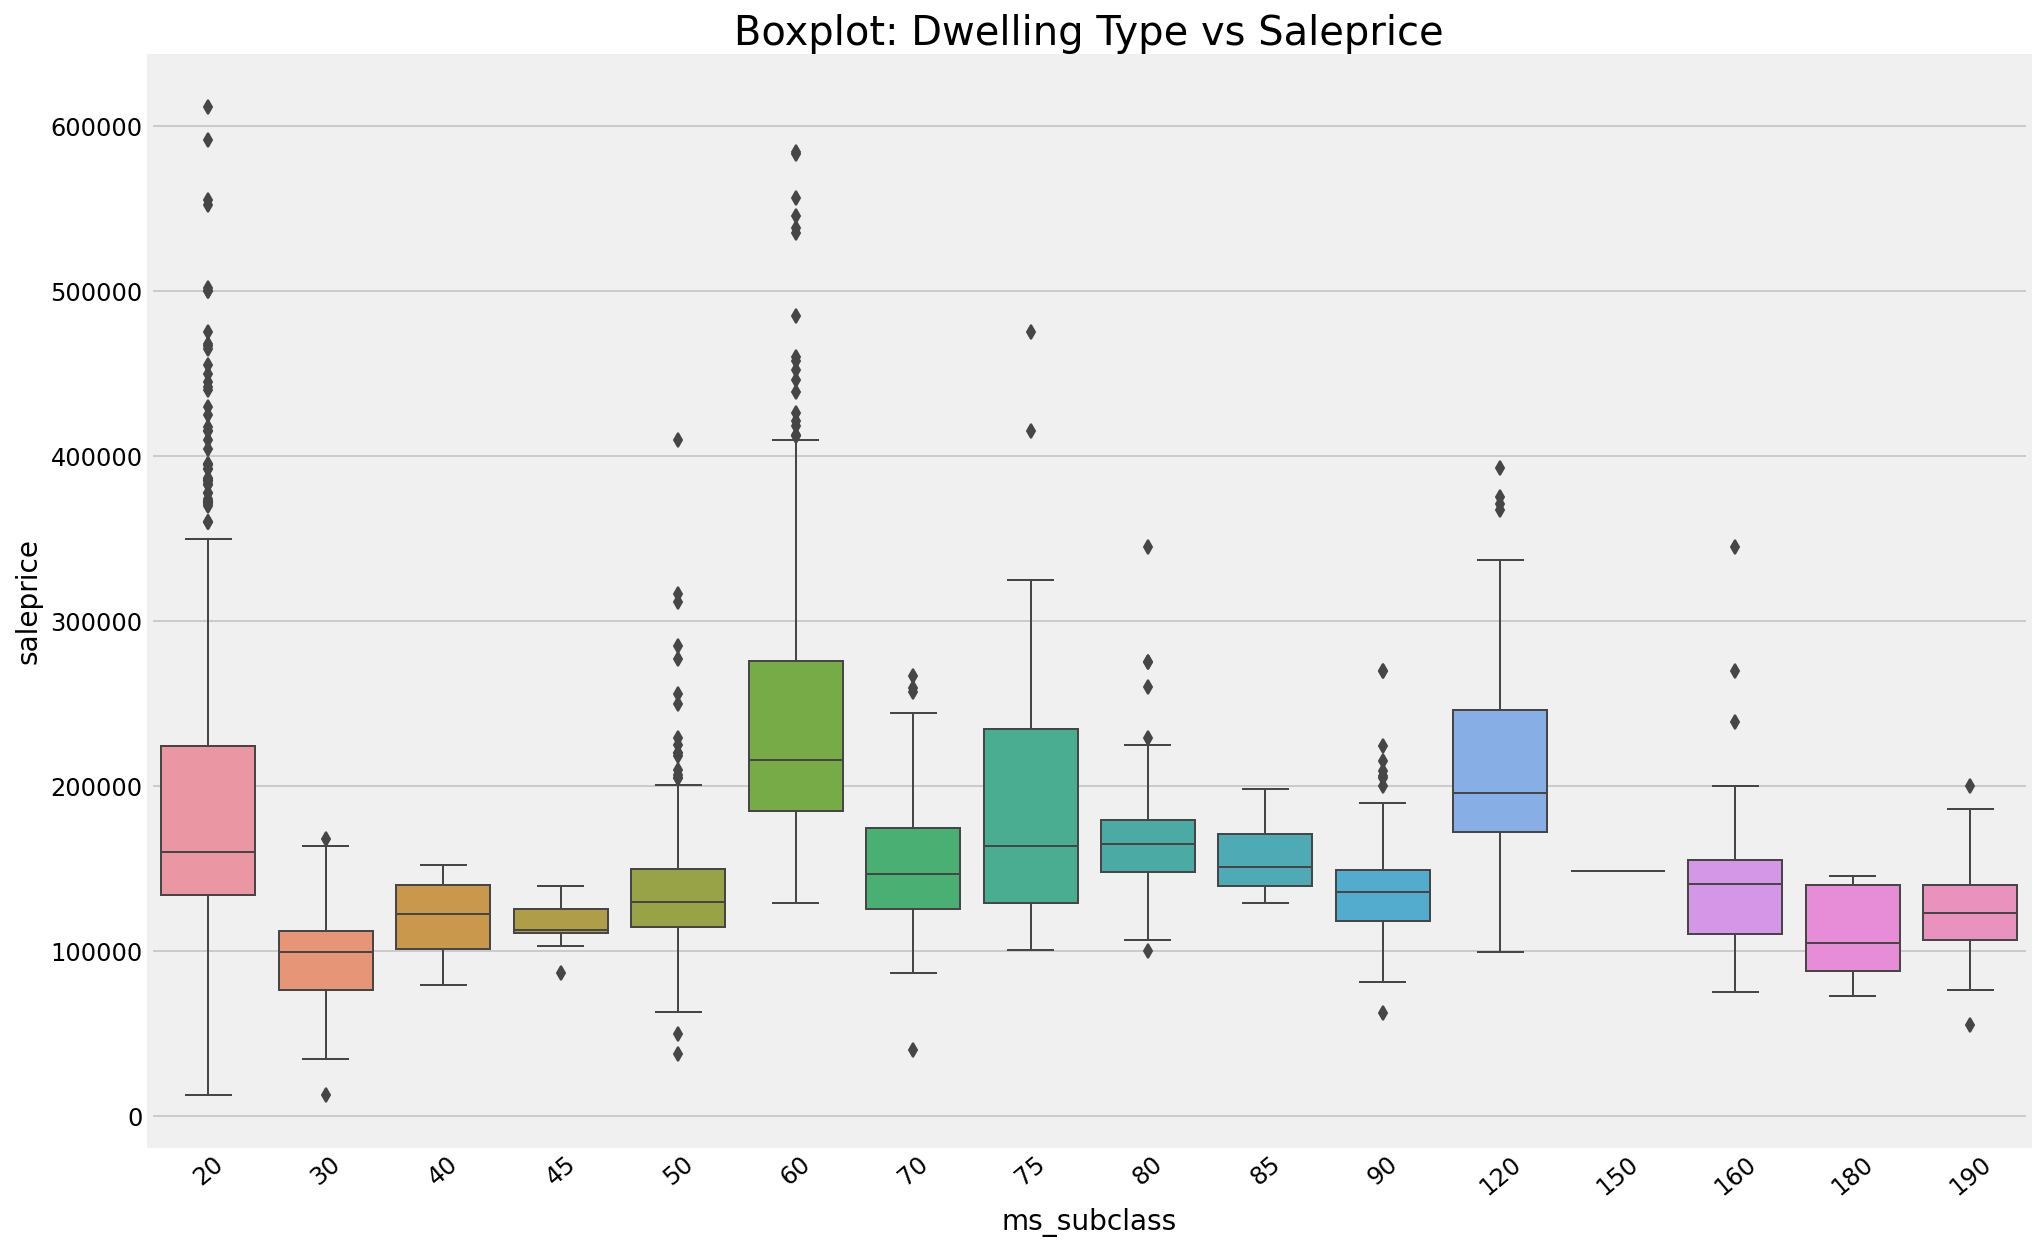

In [79]:
# plot boxplot for relationship between neighborhood and sale price

fig = plt.figure(figsize=(15,10))

sns.boxplot(x='ms_subclass', y='saleprice', data=train, linewidth=1.0);
plt.xticks(rotation=40, size=12)
plt.yticks(size=12)
plt.xlabel('ms_subclass', size=14)
plt.ylabel('saleprice', size=14)
plt.title('Boxplot: Dwelling Type vs Saleprice', size=20);

Based on the boxplots above, price varies across dwelling types as well. '1-STORY_NEW' and '2-STORY_NEW' have higher sale prices although this seems to show more of an age relationship than a story relationship.

## Conclusion

After going through a preliminary round of cleaning and EDA, we've noticed several issues with the data such as the presence of null values and columns with skewed distribution. We've solved for all of the missing values except for `garage_yr_blt` and will proceed with feature engineering in the next notebook.

From the intial EDA, we're able to identify some key features that have influence on the price of the house. We will explore these relationships further in the feature engineering notebook as well.